# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Работа будет разделена на несколько основных шагов.


**Отображение датасета.**


**Предобработка данных**
 
- Будет произведен поиск пропущенных значений. В ходе поиска пропущенные значения будут удалены или заменены на подходящие значения, способствующие дальнейшей работе над проектом. 

- Рассмотрим возможные причины отстутствия тех или иных значений.

- Рассмотрим причины выбросов и аномалий.
 
- Преобразуем типы данных на более подходящие и способствующие дальнейшей работе. 

**Добавление значений для последующей обработки данных.**

Добавим следующие столбцы в датафрейм:

- цена одного квадратного метра;

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры (значения — «первый», «последний», «другой»);

- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


**Исследовательский анализ данных:**

Будут изучены следующие параметры объектов:

- общая площадь;

- жилая площадь;

- площадь кухни;

- количество комнат;

- высота потолков;

- этаж квартиры;

- тип этажа квартиры («первый», «последний», «другой»);

- общее количество этажей в доме;

- расстояние до центра города в метрах;

- расстояние до ближайшего аэропорта;
    
- расстояние до ближайшего парка;

- день и месяц публикации объявления.
    
Отобразим основное влияние данных параметров друг на друга, а главное - на цену. 


**Общий вывод.**

### Импорт библиотек и загрузка данных

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Загрузка данных
data = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\real_estate_data.csv')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Количество записей (Y) на тип значений (X)

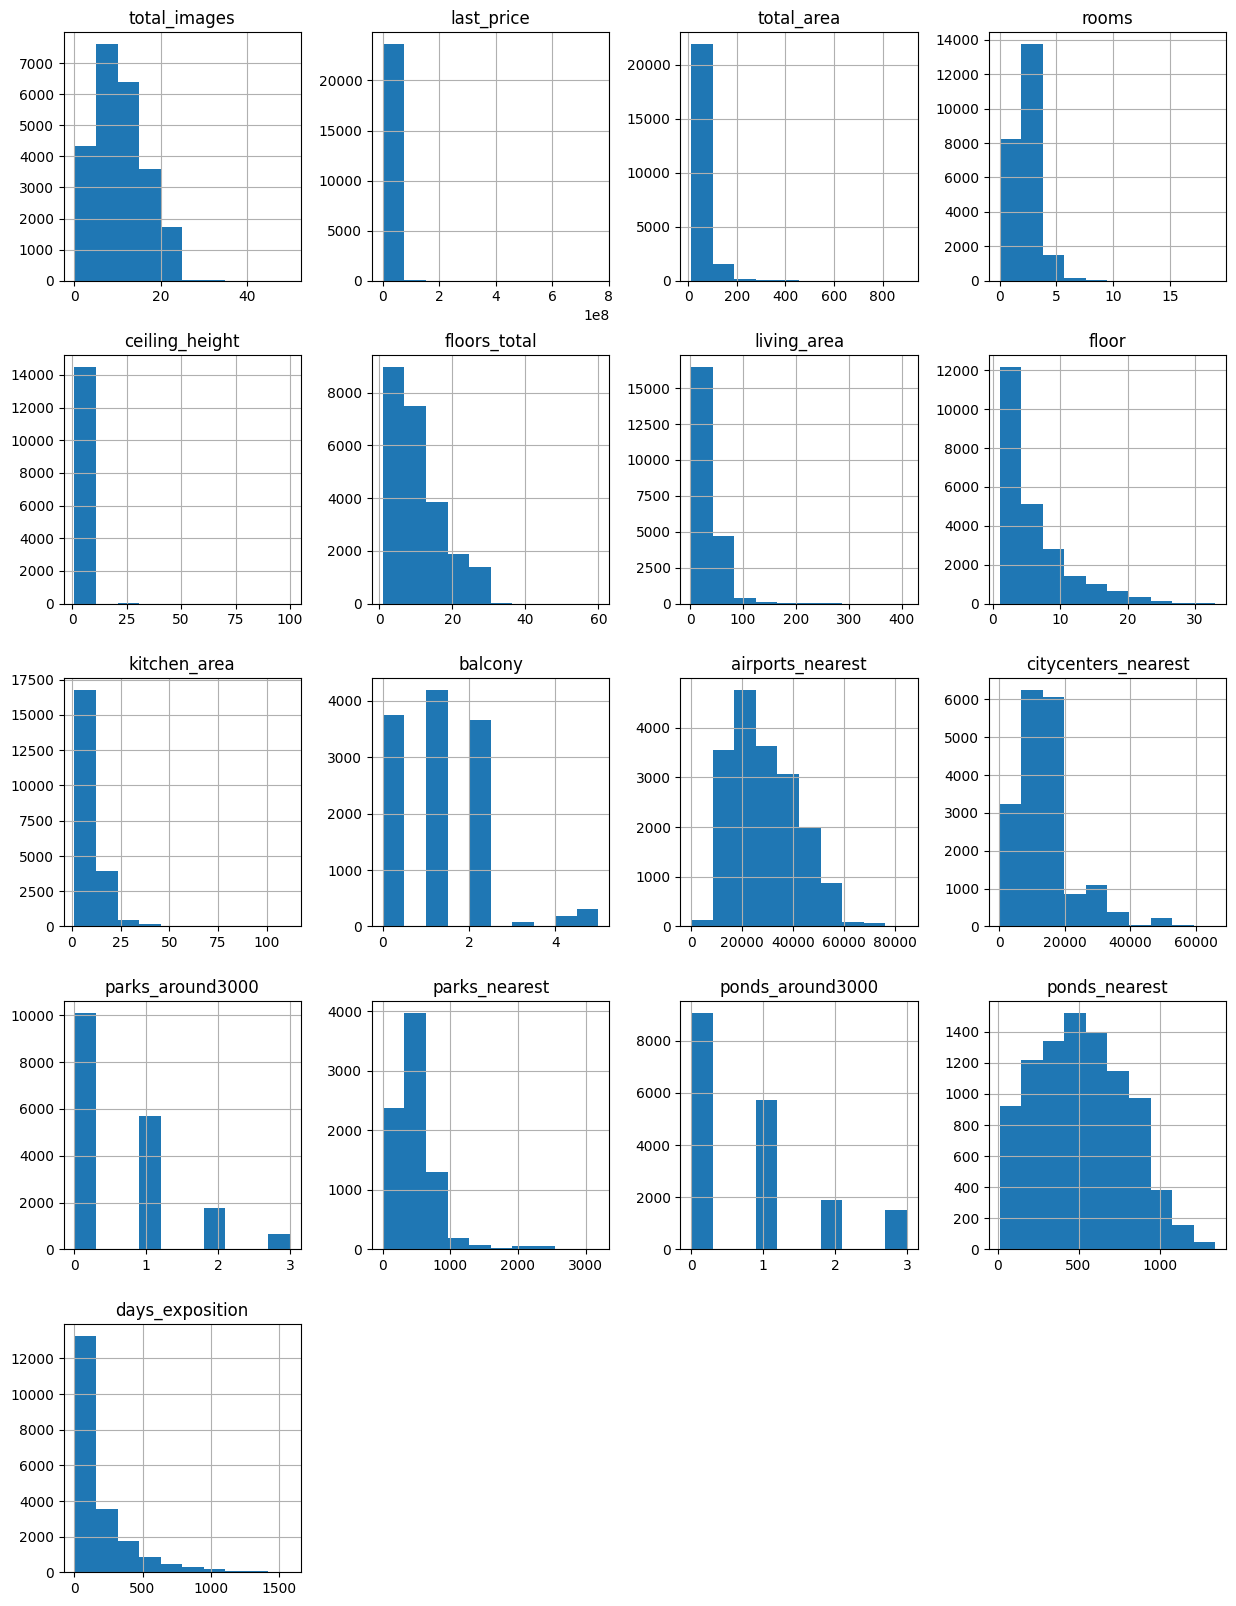

In [3]:
#Приведение названий всех столбцов к нижнему регистру
data.columns = data.columns.str.lower()
#Подсчет количества данных по всем столбцам
hist = data.hist(figsize=(15, 20));

Есть интересные, аномальные значения. Например те, у которых общая площадь (total area) превышает 400 квадратных метров или где количество балконов привышает значение 4. Рассмотрим далее их подробнее (после предобработки данных).

### Предобработка данных

#### Поиск пропущенных значений

##### Поиск столбцов с пропущенными значениями

In [4]:
NaNs = np.where(pd.isnull(data))#поиск координат (строк и столбцов) NaN
NaNs = np.array(NaNs).tolist()#преобразования массивов в списки координат
nans_columns = NaNs[1]#выборка столбцов
nans_columns = list(set(nans_columns))#преобразование множеств в список
print(nans_columns)
data_column_name = data.columns.values#находим названия столбцов в дф
print("Колонки с пропущенными значениями:", data_column_name[nans_columns])#смотрим названия столбцов с NaNsами

[5, 6, 7, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Колонки с пропущенными значениями: ['ceiling_height' 'floors_total' 'living_area' 'is_apartment'
 'kitchen_area' 'balcony' 'locality_name' 'airports_nearest'
 'citycenters_nearest' 'parks_around3000' 'parks_nearest'
 'ponds_around3000' 'ponds_nearest' 'days_exposition']


In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Количество пропущенных значений в датасете' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

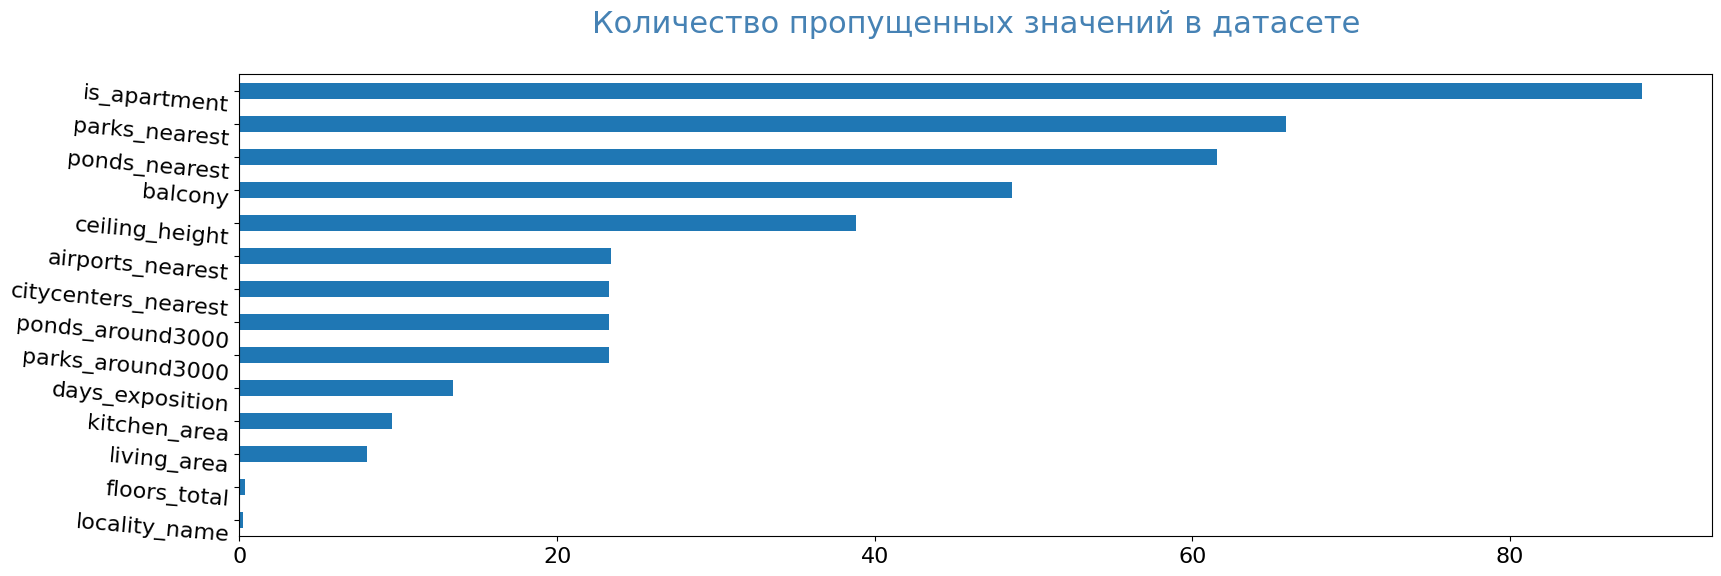

In [6]:
pass_value_barh(data)

##### Заполняем пропущенные значения

In [7]:
#Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#Заменяем пропущенные значение на False или "нет данных"
data['is_apartment'] = data['is_apartment'].fillna(False)
data['locality_name'] = data['locality_name'].fillna('нет данных')
#Cбрасываем пропущенные значения
data['floors_total'] = data['floors_total'].dropna()

**Возможные причины отсутствия данных:**

- Ряд пропущенных значений заполнить нет возможности, в связи с тем, что мы даже не можем предположить какой информации не хватает. Однако, мы можем предположить, почему некоторые данные были опущены. Общие предположения об отсутствии данных для всех столбцов: продавцы создали черновик объявления, продавцы забыли вписать эти данные / не владеют этой информацией / считают информацию не существенной, либо была какая-то техническая ошибка при создании объявления.

- **`ceiling_height`**, возможно, не указали данные еще по двум причинам: либо потолки были спроектированы согласно какому-то стандарту, и владельцы решили, что указывать эти данные нет смысла; либо они очень низкие:)
    
- **`floors_total`**- возможно, дом частный и одноэтажный.
    
- **`living_area`** - скорее всего одна из общих причин. 
        
- **`kitchen_area`** - если это квартира-студия, то могли пропустить, в остальном - общие причины
    
- **`locality_name`** - скорее всего одна из общих причин, потому как по большей части квартиры для покупки ищут именно по районам.
    
- **`airports_nearest`**, **`cityCenters_nearest`**, **`ponds_nearest`**, **`parks_nearest`**  - скорее всего их рядом просто нет или владельцы не знают, как туда добраться. Но даже при таких обстоятельствах, мы не можем изменить данные на 0 - если нам нужно будет посчитать среднее или медиану - это исказит данные (например для рассчета стоимости квартиры в зависимости от инфраструктуры). Так же мы не можем добавить в данные 'нет' так как это повлияет на тип данных. Пусть остается NaN.

#### Изменение типов данных

In [8]:
#Посмотрим на типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [9]:
#Замена типа данных в колонке с типом дата
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
#Приведем все значения к целому типу
data['last_price'] = pd.to_numeric(data['last_price']) 
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

В предыдущем задании мы преобразовали тип данных в столбце "is_appartment" из 'object' в 'bool' с помощью изменения NaNsов. В этом задании я не вижу смысла преобразовывать ничего кроме столбца "First_day_exposition". Этот столбец имел тип данных 'object', но так как там сохранены данные даты первого дня появления объявления на платформе, имеет смысл преобразовать изначальный тип данных в подходящий для него 'datetime'.

#### Устранение неявных дубликатов

Неявные дубликаты скорее всего есть в колонке locality_name.

In [10]:
#Посмотрим на уникальные значения колонки locality_name
print(data['locality_name'].nunique())
print(data['locality_name'].duplicated().sum())
print(data['locality_name'].value_counts())

365
23248
Санкт-Петербург                     15651
посёлок Мурино                        520
посёлок Шушары                        439
Всеволожск                            398
Пушкин                                369
                                    ...  
садовое товарищество Новая Ропша        1
деревня Старое Хинколово                1
поселок городского типа Рябово          1
поселок Пчевжа                          1
деревня Новолисино                      1
Name: locality_name, Length: 365, dtype: int64


In [11]:
#уберем разновидности поселков и оставим только один тип - посёлок
word = ['поселок', 'городской поселок', 'городской посёлок', 'поселок городского типа',
        'посёлок городского типа', 'коттеджный поселок','городской посёлок', 'посёлок городского типа', 
        'городской посeлок', 'городской поселок', 'коттеджный посёлок','поселок при железнодорожной станции',
        'посёлок при железнодорожной станции']
#функция для замены
for area in data['locality_name']:
    for i in range(len(word)):
        if word[i] in area:
            data['locality_name'] = data['locality_name'].str.replace(word[i], 'посёлок')

print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'посёлок Янино-1' 'посёлок Парголово'
 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'посёлок Красный Бор' 'Гатчина'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой' 'посёлок Лебяжье'
 'посёлок Сиверский' 'посёлок Молодцово' 'посёлок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'посёлок Романовка' 'посёлок Бугры' 'посёлок Рощино' 'Кириши'
 'Луга' 'Волосово'

In [12]:
# check
data['locality_name'].nunique()

322

#### Устранение выбивающихся значений

Посмотрим столбцы, которые имют аномальные или выбивающиеся значения. 

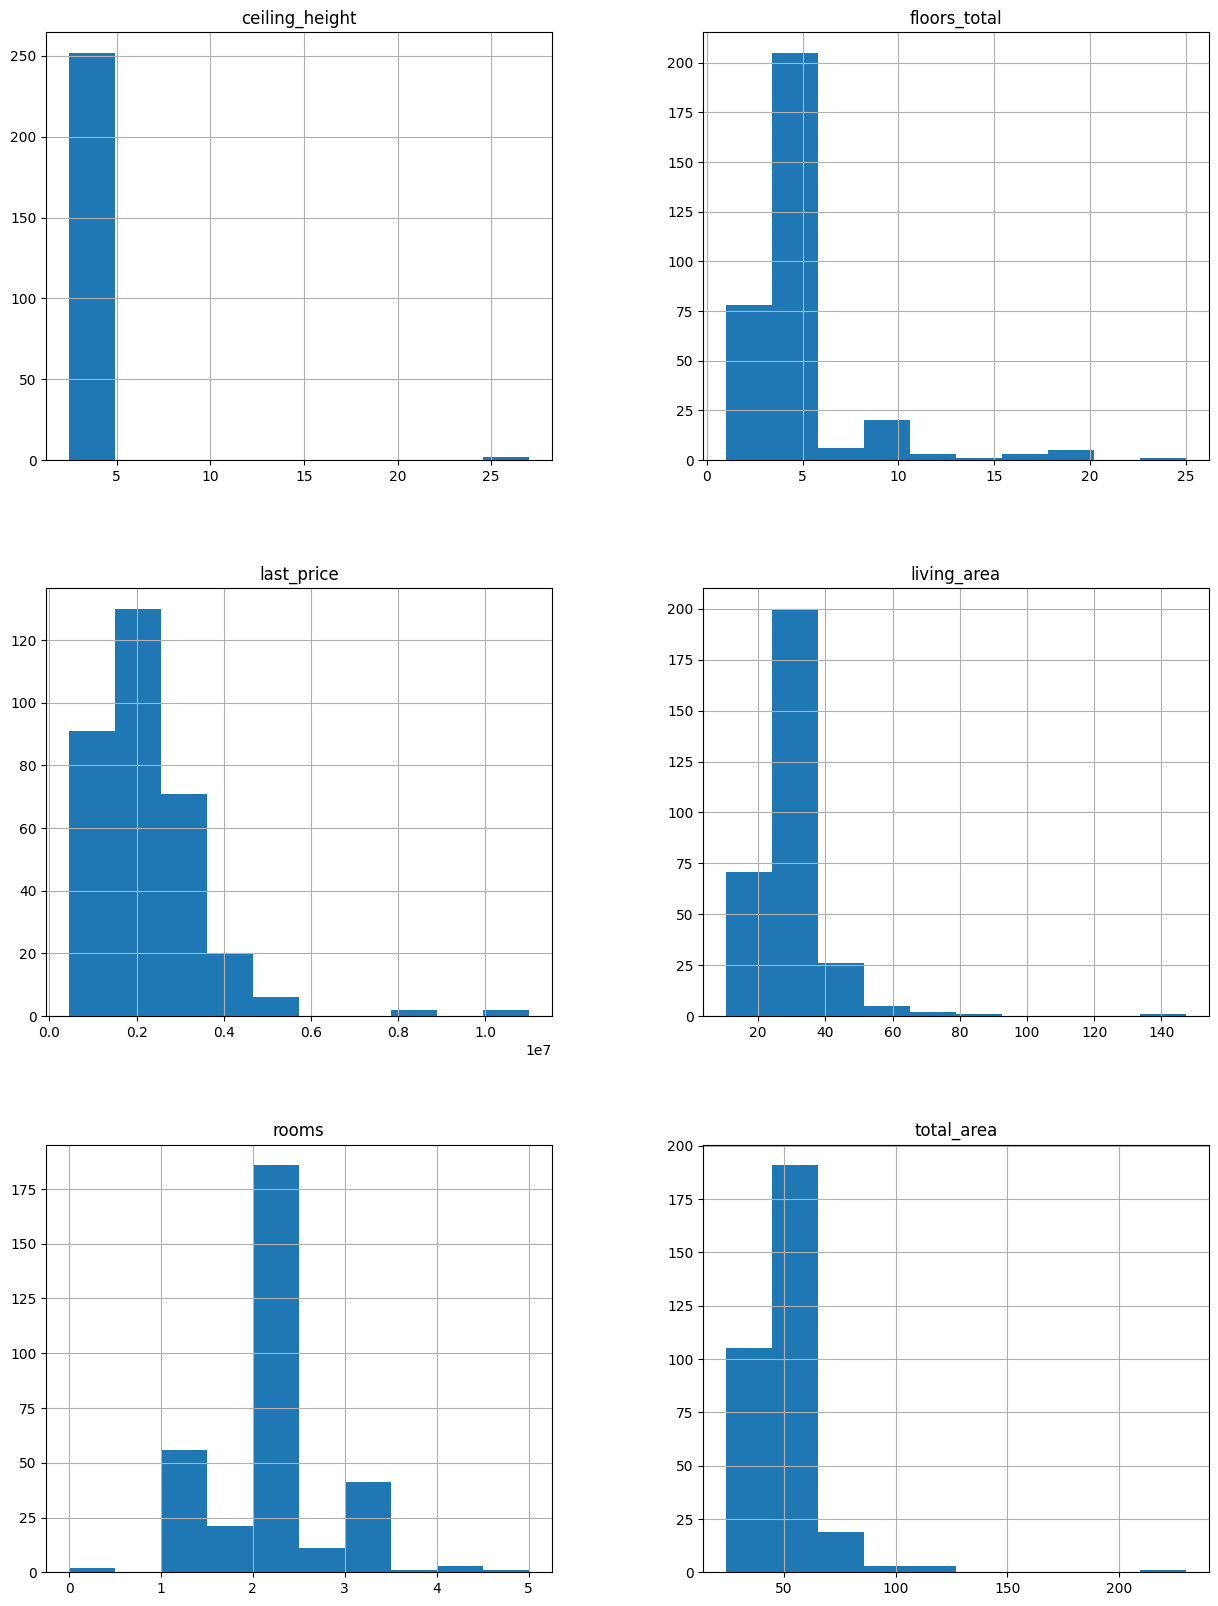

In [13]:
#Построение сводной таблицы:
pt_data = data.pivot_table(index = 'locality_name', values = ['rooms','last_price', 'total_area', 'ceiling_height', 'living_area', 'floors_total'], aggfunc = 'median')
#Построение гистограммы:
pt_data.hist(figsize=(15, 20));

Имеются выпадающие значения в столбцах во всех выбранных столбцах. Была выбрана функция median для получения более точных значений.

In [14]:
# просмотр уникальных значений ceiling_height
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

Скорее всего, значения, которые имеют высоту потолков меньше 2 и больше 10 метров либо являются аномалиями (что более вероятно), либо относятся к каким-то специализированным помещениям (бытовкам или заводам), поэтому преобразуем данные.

In [15]:
#Создадим датафреймы с "хорошими" и "плохими" потолками
good_ceiling = data.loc[((data['ceiling_height'] > 2)&(data['ceiling_height'] <= 10))|(data['ceiling_height'].isna())]
bad_ceiling = data.loc[(data['ceiling_height'] > 10)&(data['ceiling_height'] < 2)]
#Умножим "плохие" потолки на 0.1
bad_ceiling['ceiling_height'] *= 0.1
df = good_ceiling.append(bad_ceiling)

display(df['ceiling_height'].unique())

df.shape

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 8.3 , 2.98, 2.86, 3.17, 4.4 , 3.28,
       3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39,
       2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.

(23574, 22)

In [16]:
# check
df.shape

(23574, 22)

Сохраним данные только по той недвижимости, у которой указано количество этажей.

In [17]:
df = df.loc[(df['floors_total'] <= 30)|(df['floors_total'].isna())]
print(df['floors_total'].unique())
df.shape

[16 11  5 14 12 26 24 27  9  6 17 25  3 23 19 18  4 22  8  2 10  7 13 15
 20 28 21  1 29]


(23544, 22)

Жилая зона свыше 100 кв метров не кажется странным явлением, если это частный дом. Но в нашем случае 140 кв метров больше аномалия, чем закономерность, поэтому уберем эти данные из датафрейма.

In [18]:
df = df.loc[(df['living_area'] <= 100)|(df['living_area'].isna())]
print(df['living_area'].unique())
data.shape

[51.   18.6  34.3  ... 31.65 13.59 42.55]


(23613, 22)

Есть данные, по которым общая площадь недвижимости превышает 200 кв. метров. Опять-таки в контексте наших исследований, это смахивает на аномалию. Уберем их из расчетов. 

In [19]:
df = df.loc[(df['total_area'] <= 150)|(df['total_area'].isna())]
print(df['total_area'].unique())
df.shape

[108.    40.4   56.   ...  66.86 133.81  76.75]


(22950, 22)

Уберем данные, где количество комнат больше 7 и меньше 0.

In [20]:
df = df.loc[(df['rooms'] <= 7)|(df['rooms'].isna())|(df['rooms'] >= 0)]
print(df['rooms'].unique())
df.shape

[3 1 2 4 6 5 0 7]


(22950, 22)

Вряд ли жилое помещение может быть меньше 7 метров. 

In [21]:
df = df.loc[(df['living_area'] >= 7)|(df['living_area'].isna())]
print(df['living_area'].unique())
df.shape

[51.   18.6  34.3  ... 31.65 13.59 42.55]


(22942, 22)

Уберем из расчета квартиры, которые стоят больше 30 млн.

In [22]:
df = df.loc[(df['last_price'] <= 30000000)|(df['last_price'].isna())]
print(df['last_price'].unique())
df.shape

[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]


(22845, 22)

Кухня меньше 5 метров - это что-то бесчеловечное и смахивает на аномалию.

In [23]:
df = df.loc[(df['kitchen_area'] >= 5)|(df['kitchen_area'].isna())]
print(df['last_price'].unique())
df.shape

[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]


(22741, 22)

Посмотрим на аномалии с новыми данными.

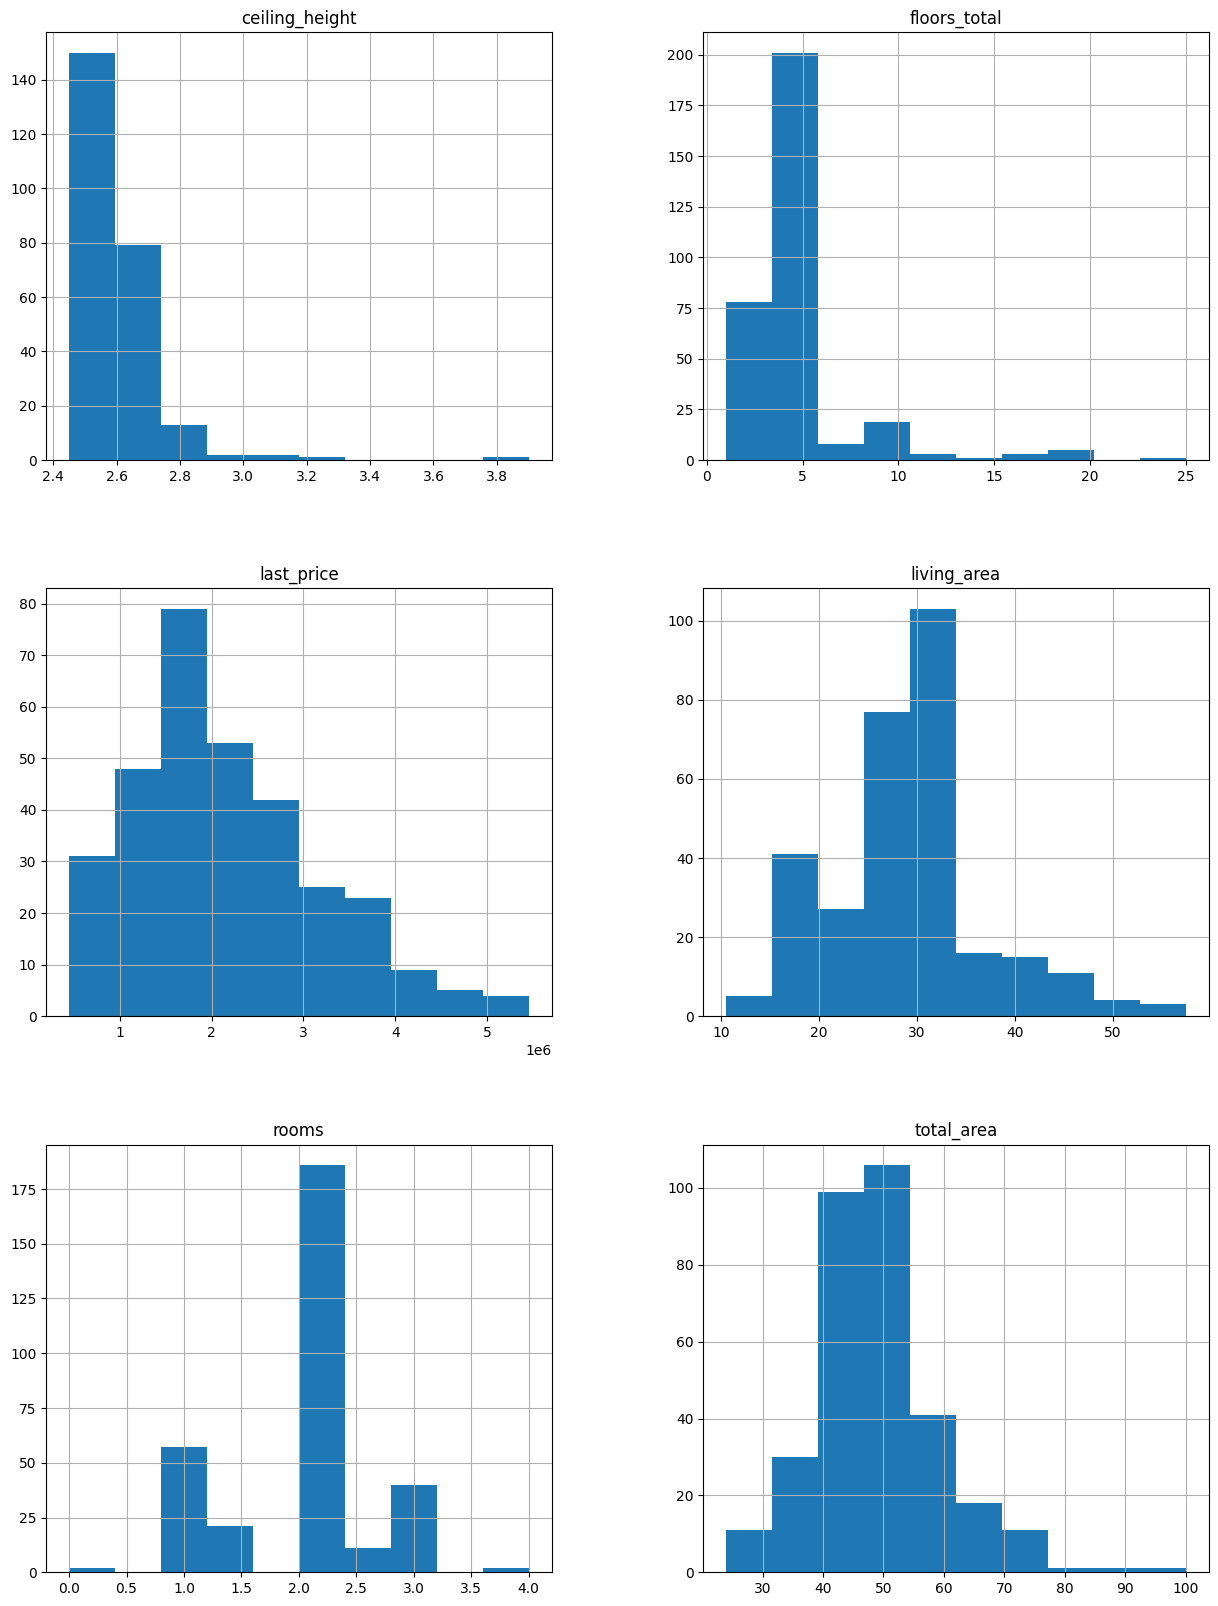

In [24]:
#Построение сводной таблицы:
pt_df = df.pivot_table(index = 'locality_name', values = ['rooms','last_price', 'total_area', 
                                                          'ceiling_height', 'living_area', 'floors_total'], 
                       aggfunc = 'median')
pt_df.hist(figsize=(15, 20));

Некоторые выбивающиеся значения не так необычны, чтобы называться аномалиями. Так или иначе задача была удалить выбивающиеся и редкие значения. Что и было сделано. Это позволит более точно рассчитывать средние значения по районам. Однако можно отметить, что те выбивающиеся значения, котрые есть в данных могут существовать в качестве офисов или складов. Удалением этих данных мы приводим данные в основном к статусу анализа жилой недвижимости.

In [25]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor','floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,741.00","22,741.00","13,906.00","19,779.00","22,741.00","20,951.00","20,595.00","22,741.00","22,741.00"
min,0.00,12.00,2.25,1.00,"12,190.00",8.00,5.00,1.00,1.00
max,7.00,150.00,8.30,"1,580.00","30,000,000.00",100.00,64.00,27.00,29.00


### Посчитайте и добавьте в таблицу новые столбцы

##### Цена одного квадратного метра

In [26]:
df['sq_meter_price'] = df['last_price']/df['total_area']

##### День недели публикации объявления

In [27]:
expo = pd.to_datetime(df['first_day_exposition'])
df['expo_week_day'] = expo.dt.weekday

##### Месяц публикации объявления

In [28]:
expo = pd.to_datetime(df['first_day_exposition'])
df['expo_month'] = expo.dt.month

##### Год публикации объявления

In [29]:
expo = pd.to_datetime(df['first_day_exposition'])
df['expo_year'] = expo.dt.year

##### Тип этажа квартиры

In [30]:
def categorize_floor(row):
    i = row['floor']
    oi = row['floors_total']
    if i == 1:
        return('первый')
    if i == oi:
        return('последний')
    if 1 <= i <= oi:
        return('другое')
    
df['floor_type'] = df.apply(categorize_floor, axis=1)

##### Расстояние до центра города в километрах

In [31]:
df['city_centre_km'] = df['citycenters_nearest']/1000
df['city_centre_km'] = round(df['city_centre_km'])

In [32]:
#Посмотрим на конечный результат добавления колонок:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,expo_week_day,expo_month,expo_year,floor_type,city_centre_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другое,NaN


### Проведите исследовательский анализ данных

#### Исследование параметров объектов

##### Общая площадь и жилая площадь

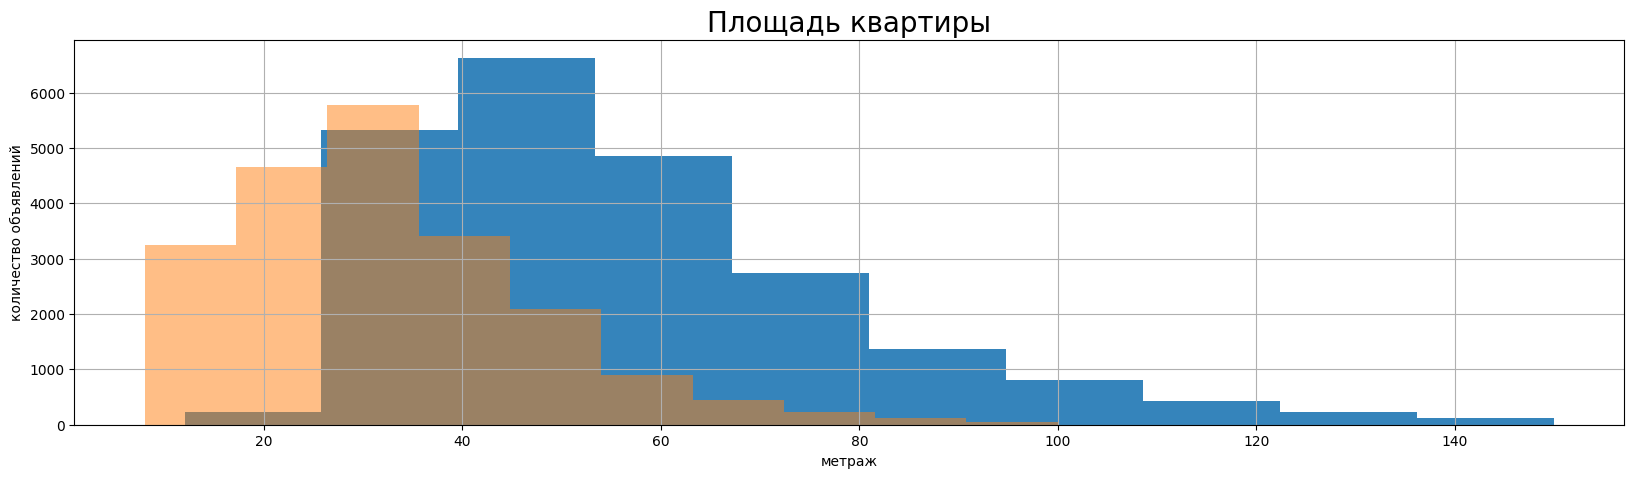

In [33]:
#Построим две диаграммы с отображением общей площади квартир:
ta = df['total_area'].hist(bins = 10, figsize=(20, 5), alpha = 0.9);
la = df['living_area'].hist(bins = 10, figsize=(20, 5), alpha = 0.5);
la.set_title('Площадь квартиры', fontsize = 20);
ta.set_xlabel('метраж');
ta.set_ylabel('количество объявлений');

Исходя из данных столбца 'total_area', мы можем сделать вывод, что большая часть недвижимости - та, площадь которой составляет от 30 до 80 кв метров. Вероятнее всего - это частная жилая недвижимость. Если посмотреть на график 'living_area', то можно увидеть, что у большинства квартир жилая площадь занимает от 15 до 50 кв м. В принципе, это подтверждает предположение о том, что большая часть объявлений - жилая недвижимость. Мы можем сделать предположение, что площадь, у которой "жилая зона" больше 10 кв.м. является коммерческой. 

Я решила объединить эти два графика, потому что посчитала это нагляднее

##### Площадь кухни

20951


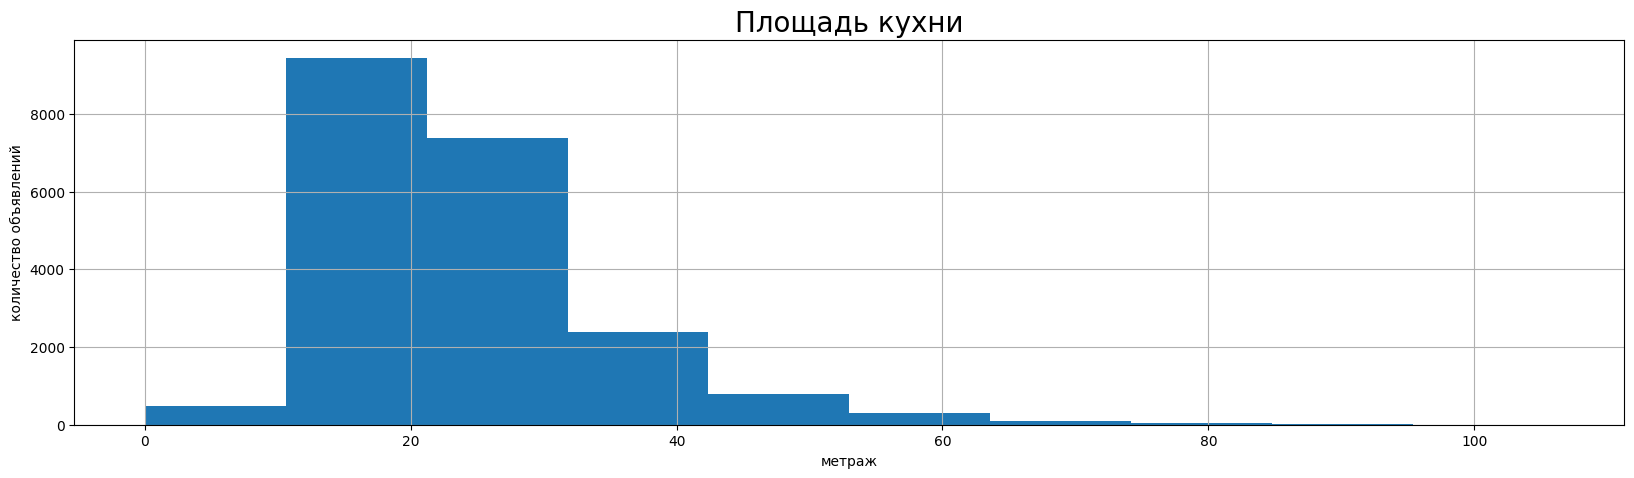

In [34]:
#Добавим еще один столбец в датафрейм
df['kitchen_area'] = df['total_area'] - df['living_area']
print(df['kitchen_area'].count())
#Построим гистограму с отображением площади кухни:
ax = df['kitchen_area'].hist(bins = 10, figsize=(20, 5));
ax.set_title('Площадь кухни', fontsize = 20);
ax.set_xlabel('метраж');
ax.set_ylabel('количество объявлений');

По этим данным мы можем с бОльшим успехом определить количество объявлений с жилой недвижимостью (считать проще). Более 12000 объявлений позиционируют себя как продажа некоммерческой недвижимости с жилой зоной. Подозреваю, что 20 кв метров это размер не только кухни, но включают в себя ванную и санузел. Так или иначе, у большей части объявлений кухня, скорее всего, больше 10 кв.м.

##### Цена объекта

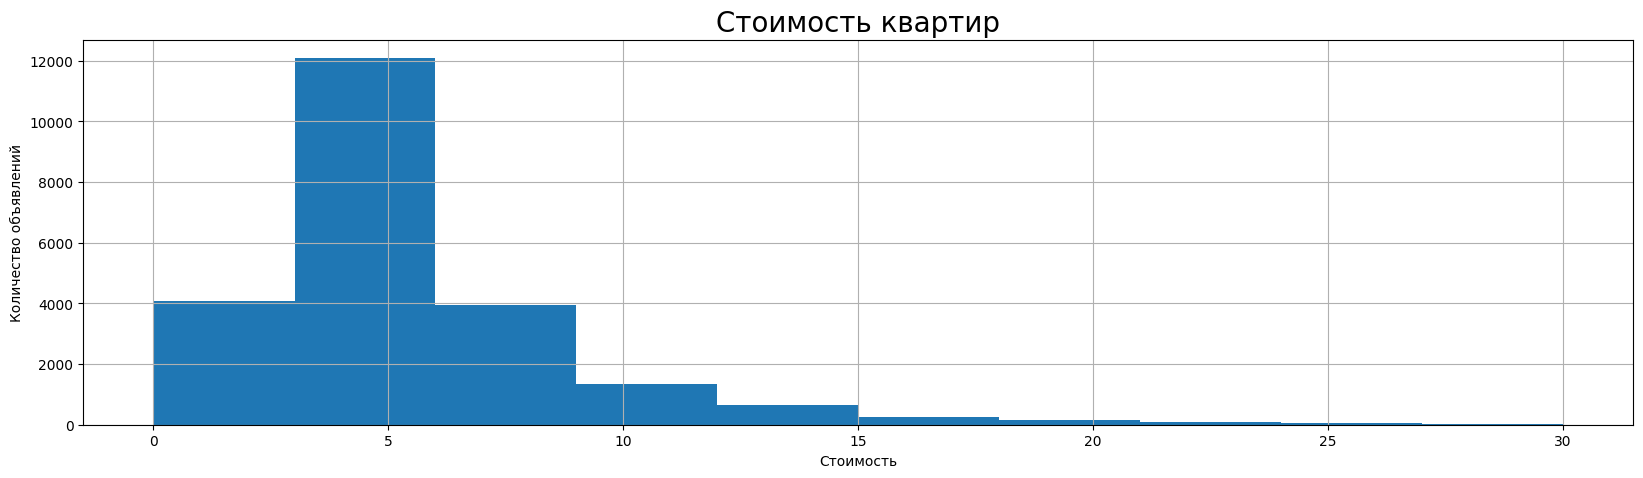

In [35]:
#Построим гистограмму с отображением стоимости квартир
lp_in_le6 = df['last_price']/1000000
lple6 = lp_in_le6.hist(bins = 10,figsize=(20, 5));
lple6.set_title('Стоимость квартир', fontsize = 20);
lple6.set_xlabel('Стоимость');
lple6.set_ylabel('Количество объявлений');

Более 10 000 объявлений стоимостью до 20 млн рублей! Так или иначе, даже такую сумму сложно представить обычному человеку.

##### Количество комнат

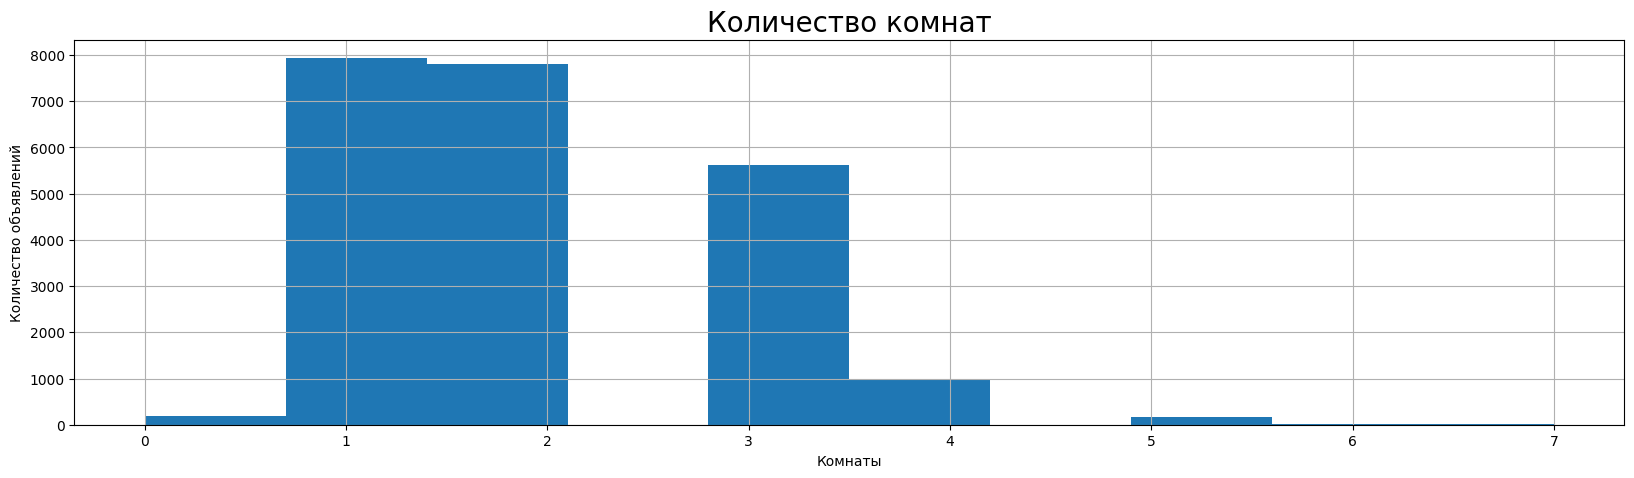

In [36]:
#Построим гистограмму с отображением количества комнат
room = df['rooms'].hist(bins = 10, figsize=(20, 5));
room.set_title('Количество комнат',
                fontsize = 20);
room.set_xlabel('Комнаты');
room.set_ylabel('Количество объявлений');

Большая часть продающейся недвижимости однушки - трешки

##### Высота потолков

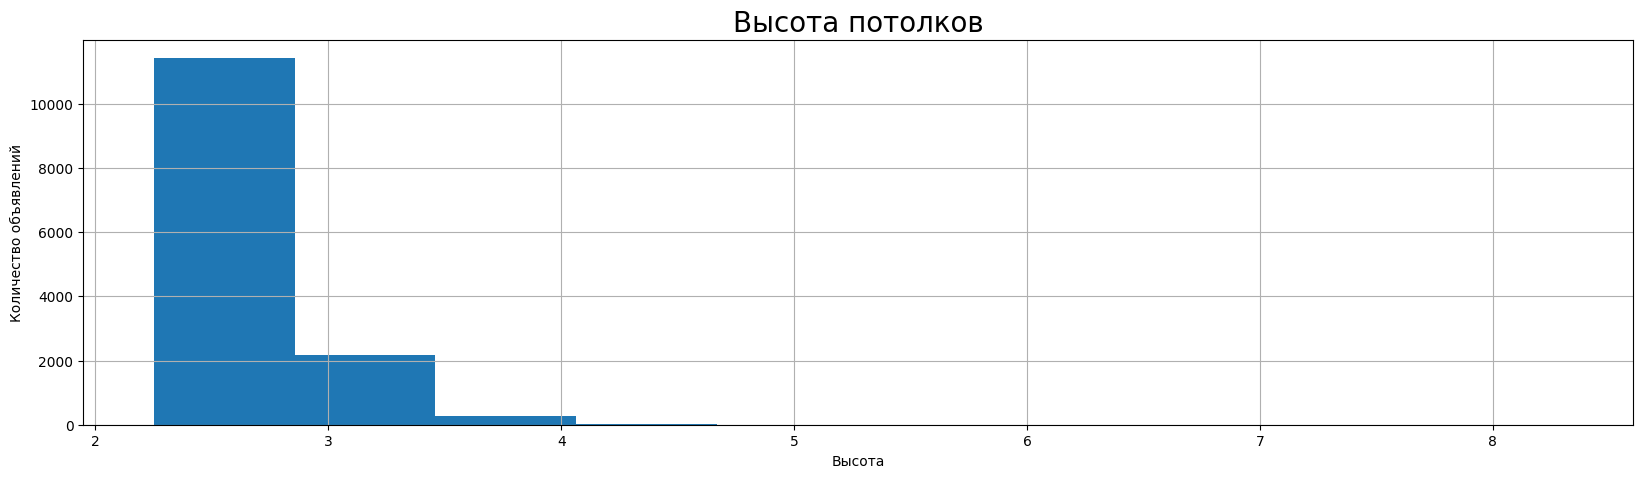

In [37]:
#Построим гистограмму с отображением высоты потолков. 
ch = df['ceiling_height'].hist(bins = 10, figsize=(20, 5));
ch.set_title('Высота потолков', fontsize = 20);
ch.set_xlabel('Высота');
ch.set_ylabel('Количество объявлений');

Большая часть потолков не достигает 3 метров.

##### Этаж недвижимости и их количество в здании

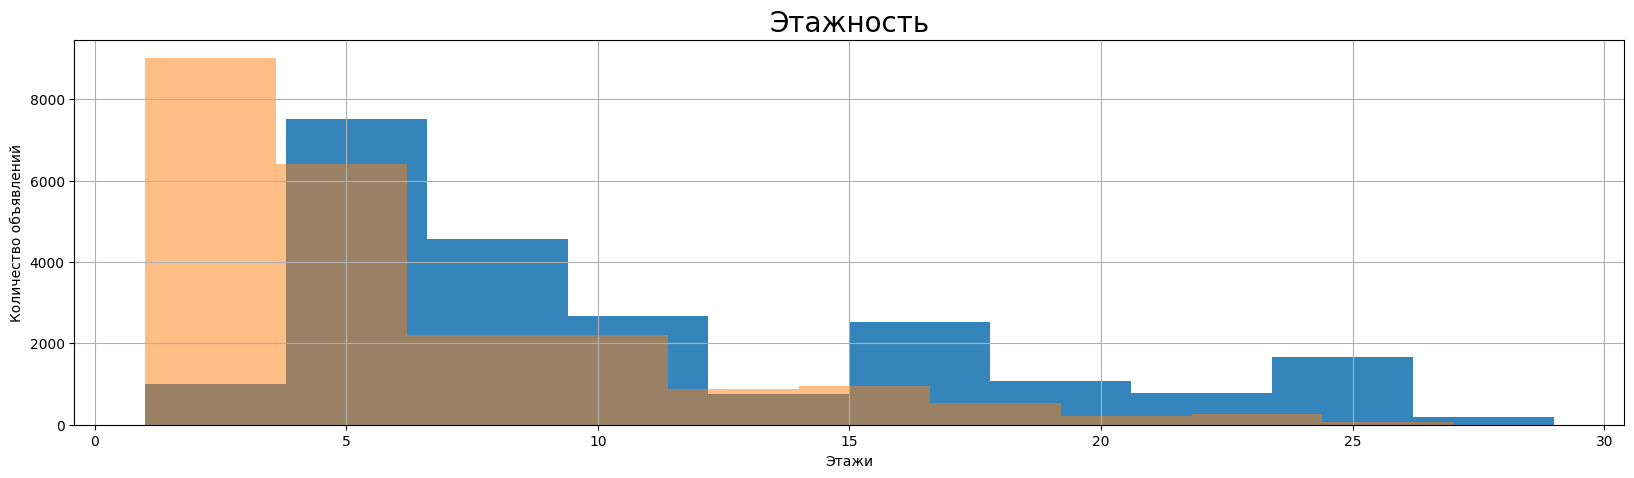

In [38]:
#Построим гистограмму с отображением этажности зданий
ft = df['floors_total'].hist(bins = 10, figsize=(20, 5), alpha = 0.9)
f = df['floor'].hist(bins = 10, figsize=(20, 5), alpha = 0.5);
ft.set_title('Этажность', fontsize = 20);
ft.set_xlabel('Этажи');
ft.set_ylabel('Количество объявлений');

Выглядит так, как будто есть зависимость: чем ниже этаж, тем больше вероятность выставления недвижимости на продажу... Наверное, все люди немного романтики и любят наблюдать за облаками, поэтому не продают то, что, судя по всему, приобретается с трудом:) 5этажных и 10этажных зданий больше всего и, вероятнее всего, это все вторичка.

Я решила объединить эти два графика, потому что посчитала это нагляднее.

##### Тип этажа

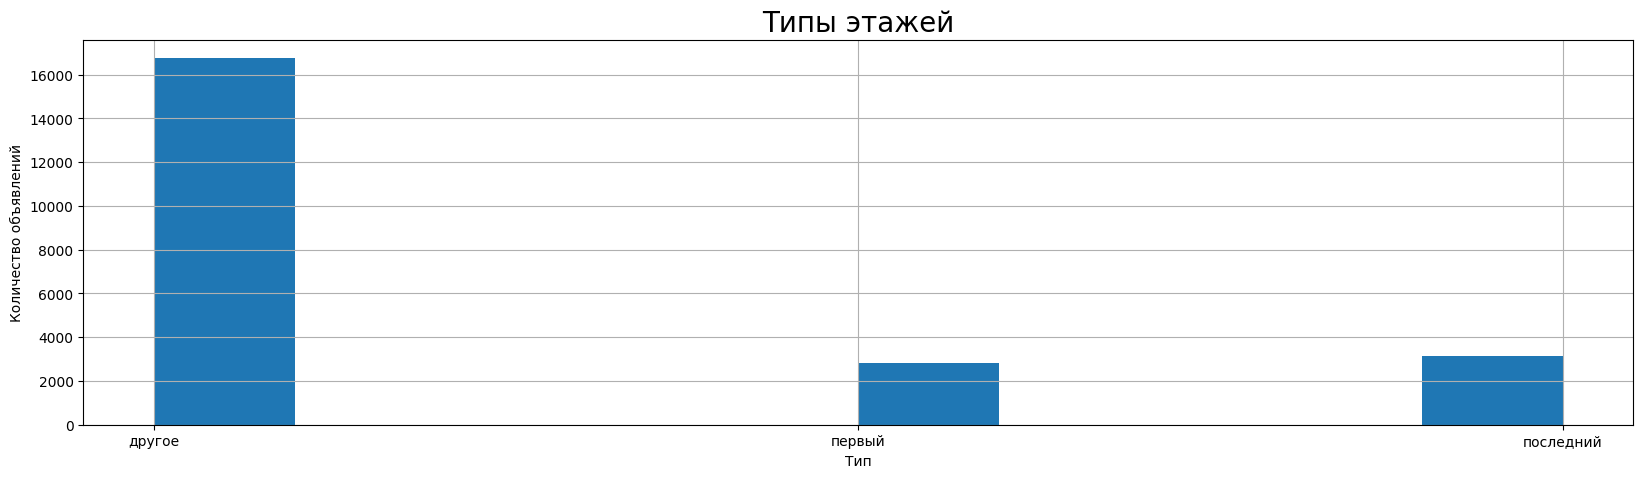

In [39]:
#Посмотрим на тип этажа
ftype = df['floor_type'].hist(figsize=(20, 5));
ftype.set_title('Типы этажей', fontsize = 20);
ftype.set_xlabel('Тип');
ftype.set_ylabel('Количество объявлений');

Интересно то, что количество объявлений по первому и последнему этажу примерно одинаковое.

##### Расстояние до центра города в метрах

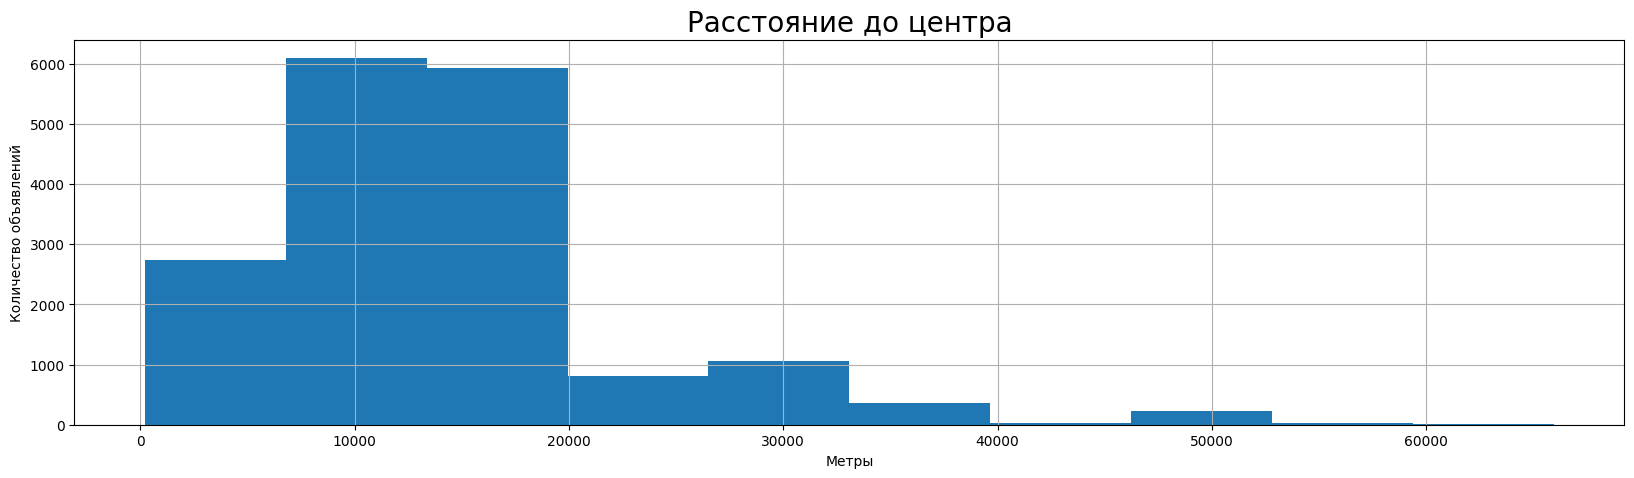

In [40]:
#Построим гистограмму с отображением расстояния до центра
cn = df['citycenters_nearest'].hist(figsize=(20, 5));
cn.set_title('Расстояние до центра', fontsize = 20);
cn.set_xlabel('Метры');
cn.set_ylabel('Количество объявлений');

Интересно то, что количество объявлений по первому и последнему этажу примерно одинаковое.

##### Расстояние до ближайшего аэропорта

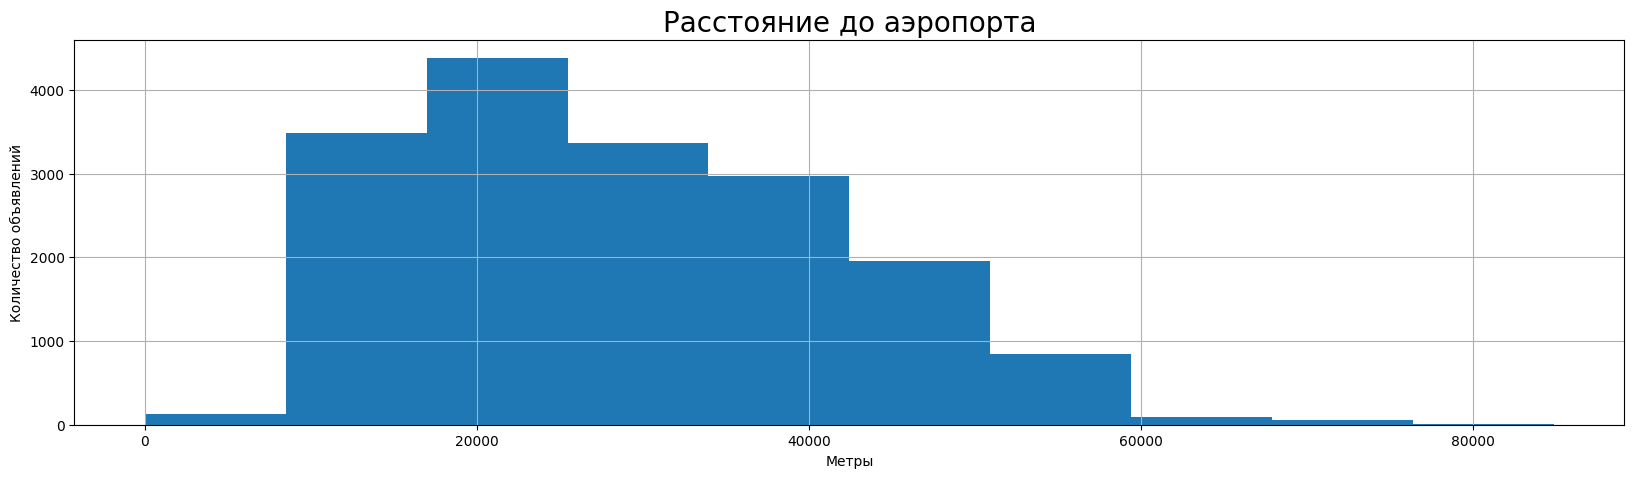

In [41]:
#Построим гистограмму с отображением расстояния до аэропорта
an = df['airports_nearest'].hist(figsize=(20, 5))
an.set_title('Расстояние до аэропорта', fontsize = 20);
an.set_xlabel('Метры');
an.set_ylabel('Количество объявлений');

##### Расстояние до ближайшего парка

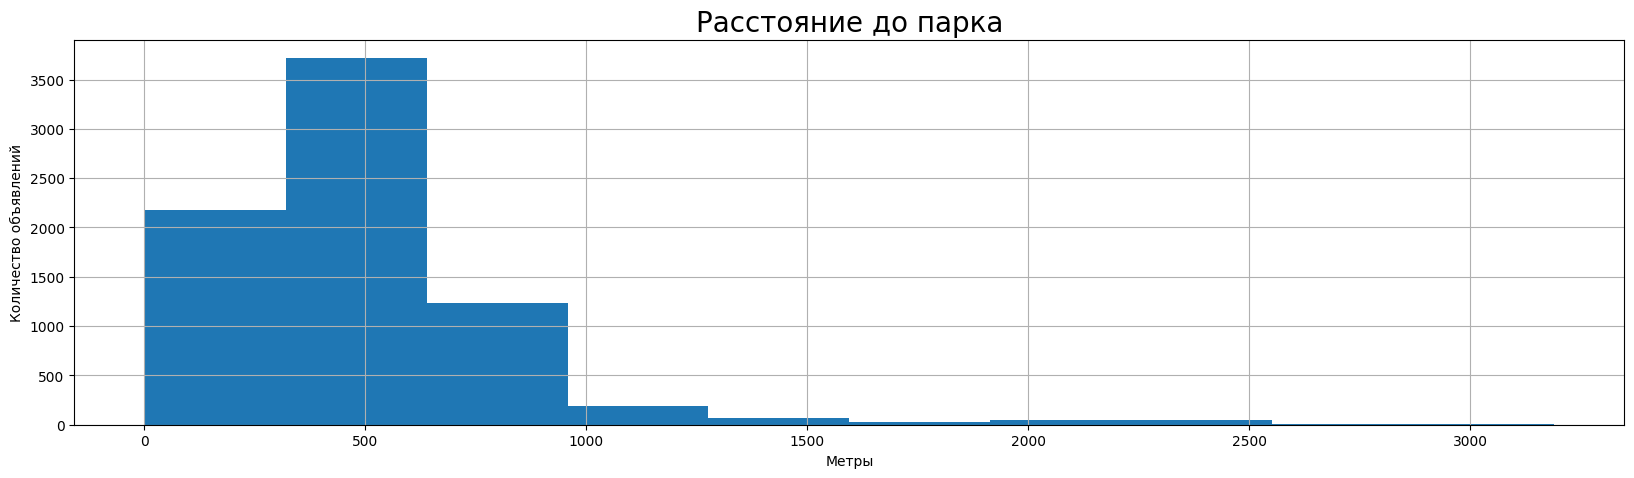

In [42]:
#Построим гистограмму с отображением расстояния до парка
pn = df['parks_nearest'].hist(figsize=(20, 5));
pn.set_title('Расстояние до парка', fontsize = 20);
pn.set_xlabel('Метры');
pn.set_ylabel('Количество объявлений');

##### День и месяц публикации объявления

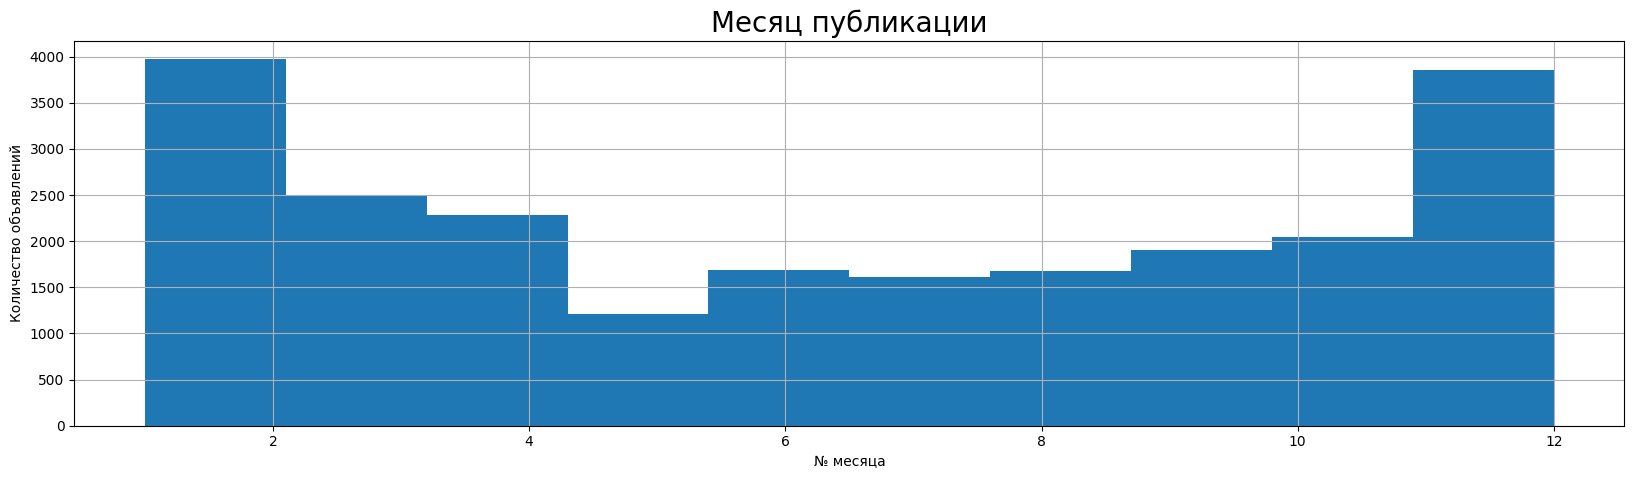

In [43]:
#Посмотрим, в какие месяцы чаще всего публикуют объявления
em = df['expo_month'].hist(figsize=(20, 5));
em.set_title('Месяц публикации', fontsize = 20);
em.set_xlabel('№ месяца');
em.set_ylabel('Количество объявлений');

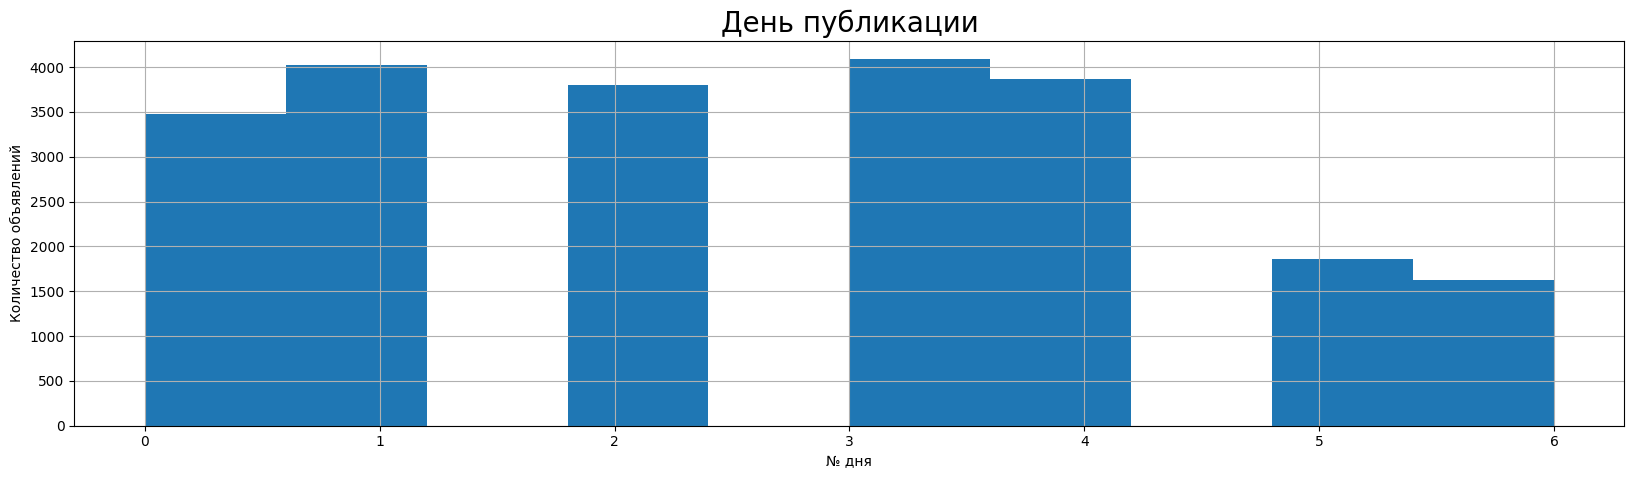

In [44]:
#Посмотрим, в какие дни недели чаще всего публикуют объявления
ewd = df['expo_week_day'].hist(figsize=(20, 5));
ewd.set_title('День публикации', fontsize = 20);
ewd.set_xlabel('№ дня');
ewd.set_ylabel('Количество объявлений');

Исходя из этих данных, мы можем сделать вывод, что большая часть объявлений выставляются зимой и в будние дни. Особенно во вторник и в четверг. В мае, видимо из-за праздников и отпусков мало кто решается выставлять объявления о продаже.

#### Скорость продажи квартир

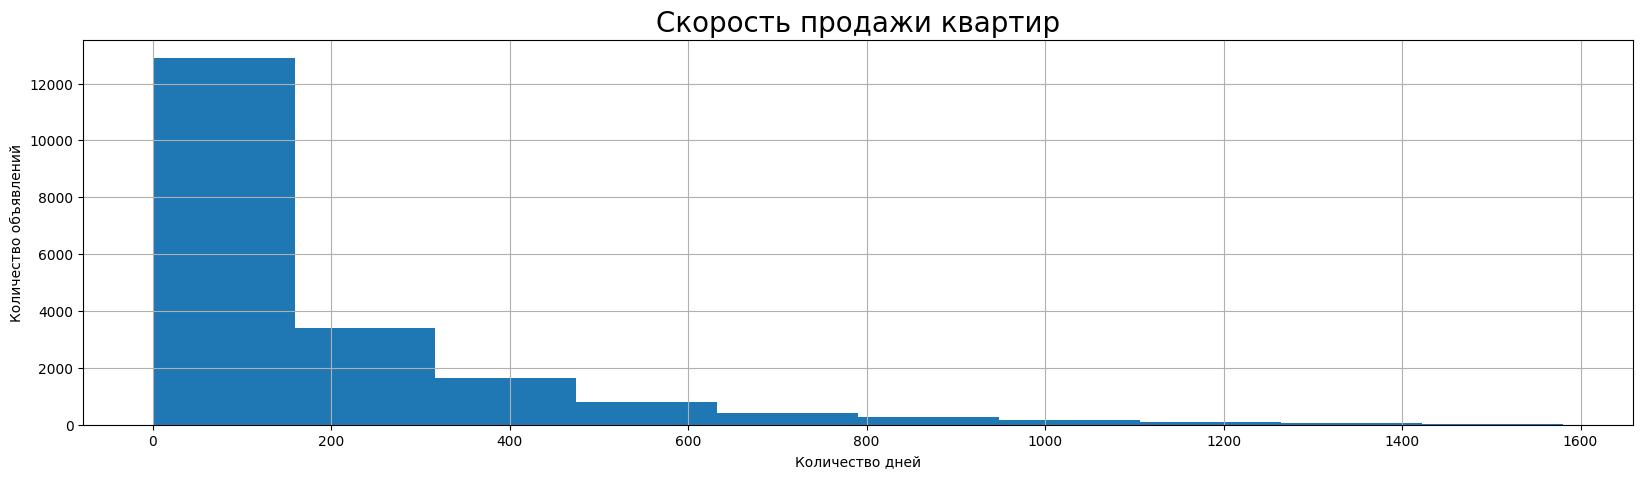

In [45]:
#Посмотрим, как долго объявления чаще всего находятся на сайте 
de = df['days_exposition'].hist(figsize=(20, 5));
de.set_title('Скорость продажи квартир', fontsize = 20);
de.set_xlabel('Количество дней');
de.set_ylabel('Количество объявлений');

In [46]:
print('Средняя длительность размещения:', data['days_exposition'].mean())
print('Медиана размещений:', data['days_exposition'].median())

Средняя длительность размещения: 180.88483929357665
Медиана размещений: 95.0


#### Какие факторы больше всего влияют на общую стоимость объекта?

                 floor  kitchen_area  living_area  lp_in_le6     rooms  \
floor         1.000000      0.104886    -0.080726   0.393021 -0.082380   
kitchen_area  0.104886      1.000000     0.252092   0.429127  0.242546   
living_area  -0.080726      0.252092     1.000000   0.134577  0.850380   
lp_in_le6     0.393021      0.429127     0.134577   1.000000  0.052691   
rooms        -0.082380      0.242546     0.850380   0.052691  1.000000   
total_area    0.037572      0.711984     0.826107   0.339568  0.766790   

              total_area  
floor           0.037572  
kitchen_area    0.711984  
living_area     0.826107  
lp_in_le6       0.339568  
rooms           0.766790  
total_area      1.000000  


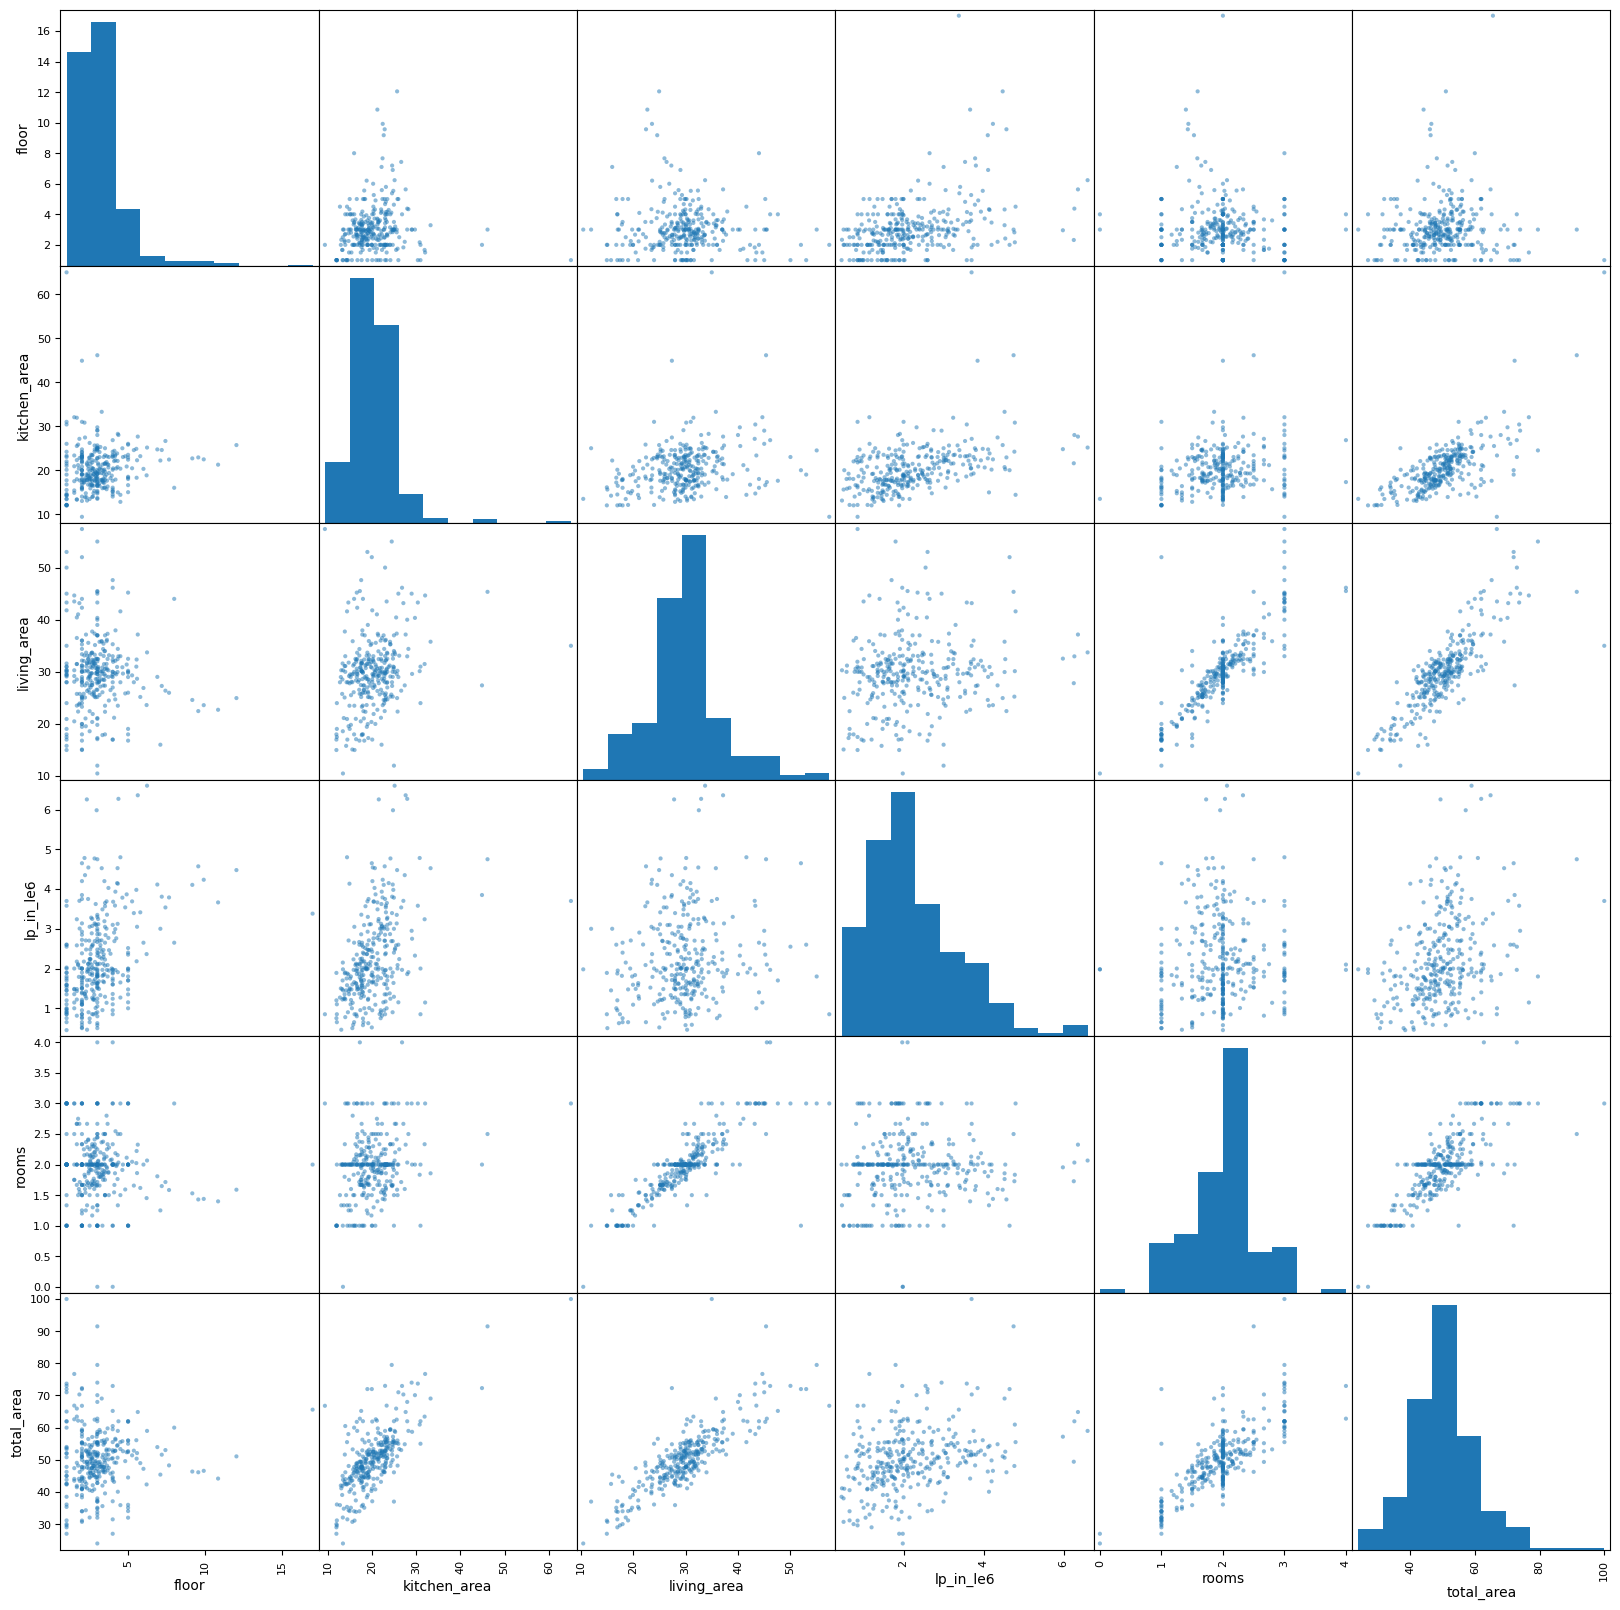

In [47]:
#Сократим стоимость квартир на 100000 для более корректного отображения
df['lp_in_le6'] = df['last_price']/1000000
#Сводная таблица
pt_area_price = df.pivot_table(index='locality_name', values=['lp_in_le6', 'total_area', 'living_area', 'kitchen_area', 'floor', 'rooms'])
sm = pd.plotting.scatter_matrix(pt_area_price, figsize=(20, 20));

print(pt_area_price.corr());


С помощью построения матрицы с диаграммами рассеяния мы выявили, что есть зависимость между общей площадью, площадью кухни, этажом и ценой. Большее и основное влияние играют площадь кухни и общая площадь квартиры. Так же на диаграммах можно заметить, что большая часть продающейся недвижимости - двушки. Вероятнее, лучше всего было бы взять их для поиска более точной зависимости цены от площади.

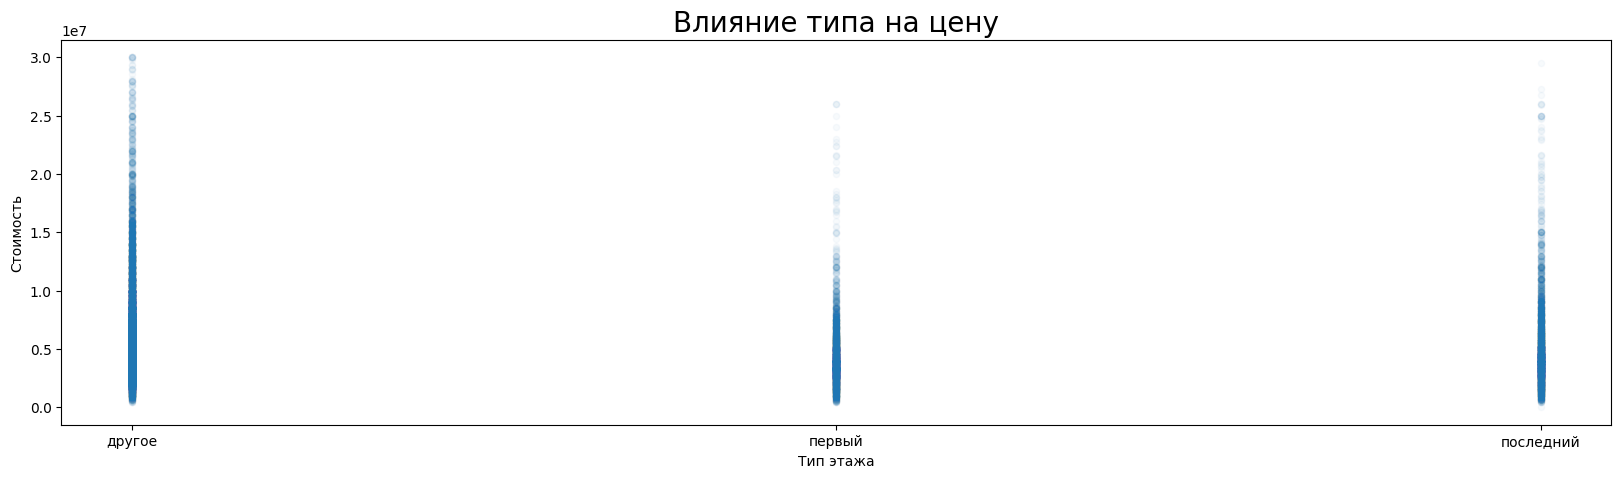

In [48]:
#Построим гистограмму влияния типа этажа на цену
pl_type = df.plot(x='floor_type', y='last_price', kind='scatter', figsize=(20, 5), alpha=0.03);
pl_type.set_title('Влияние типа на цену', fontsize = 20);
pl_type.set_xlabel('Тип этажа');
pl_type.set_ylabel('Стоимость');


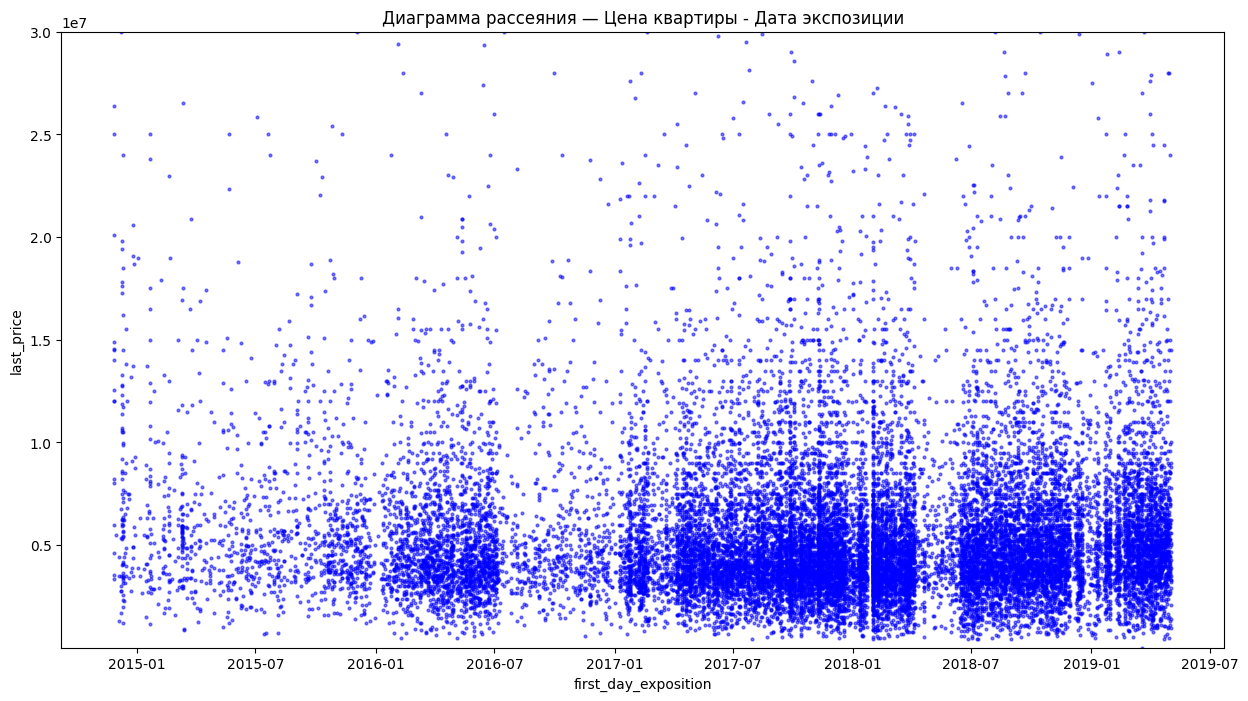

In [49]:
a = df.plot(kind='scatter',
        y='last_price' , x='first_day_exposition', ylim=(df['last_price'].min(),df['last_price'].max()), 
        alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4);
plt.title('Диаграмма рассеяния — Цена квартиры - Дата экспозиции');


Для этих показателей сложнее строить матрицу диаграммы рассеяния, поэтому я построила две отдельные диаграммы рассеяния, чтобы выявить зависимость. Похоже, что есть зависимость между типом этажа. На первом и последнем этаже стоимость ниже.

Что касается зависимости цены от даты экспозиции, то тут мы видим, что cо второй половины 2017 года был явный скачок по количеству объявлений, а весной 2018 года так же резко приостановился этот рост ненадолго. Возможно, есть какой-то внешний фактор, который на это повлиял.

**Построим матрицу рассеяния по дате объявления и цене**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22741 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22741 non-null  int64         
 1   last_price            22741 non-null  float64       
 2   total_area            22741 non-null  float64       
 3   first_day_exposition  22741 non-null  datetime64[ns]
 4   rooms                 22741 non-null  int64         
 5   ceiling_height        13906 non-null  float64       
 6   floors_total          22741 non-null  int64         
 7   living_area           20951 non-null  float64       
 8   floor                 22741 non-null  int64         
 9   is_apartment          22741 non-null  bool          
 10  studio                22741 non-null  bool          
 11  open_plan             22741 non-null  bool          
 12  kitchen_area          20951 non-null  float64       
 13  balcony         

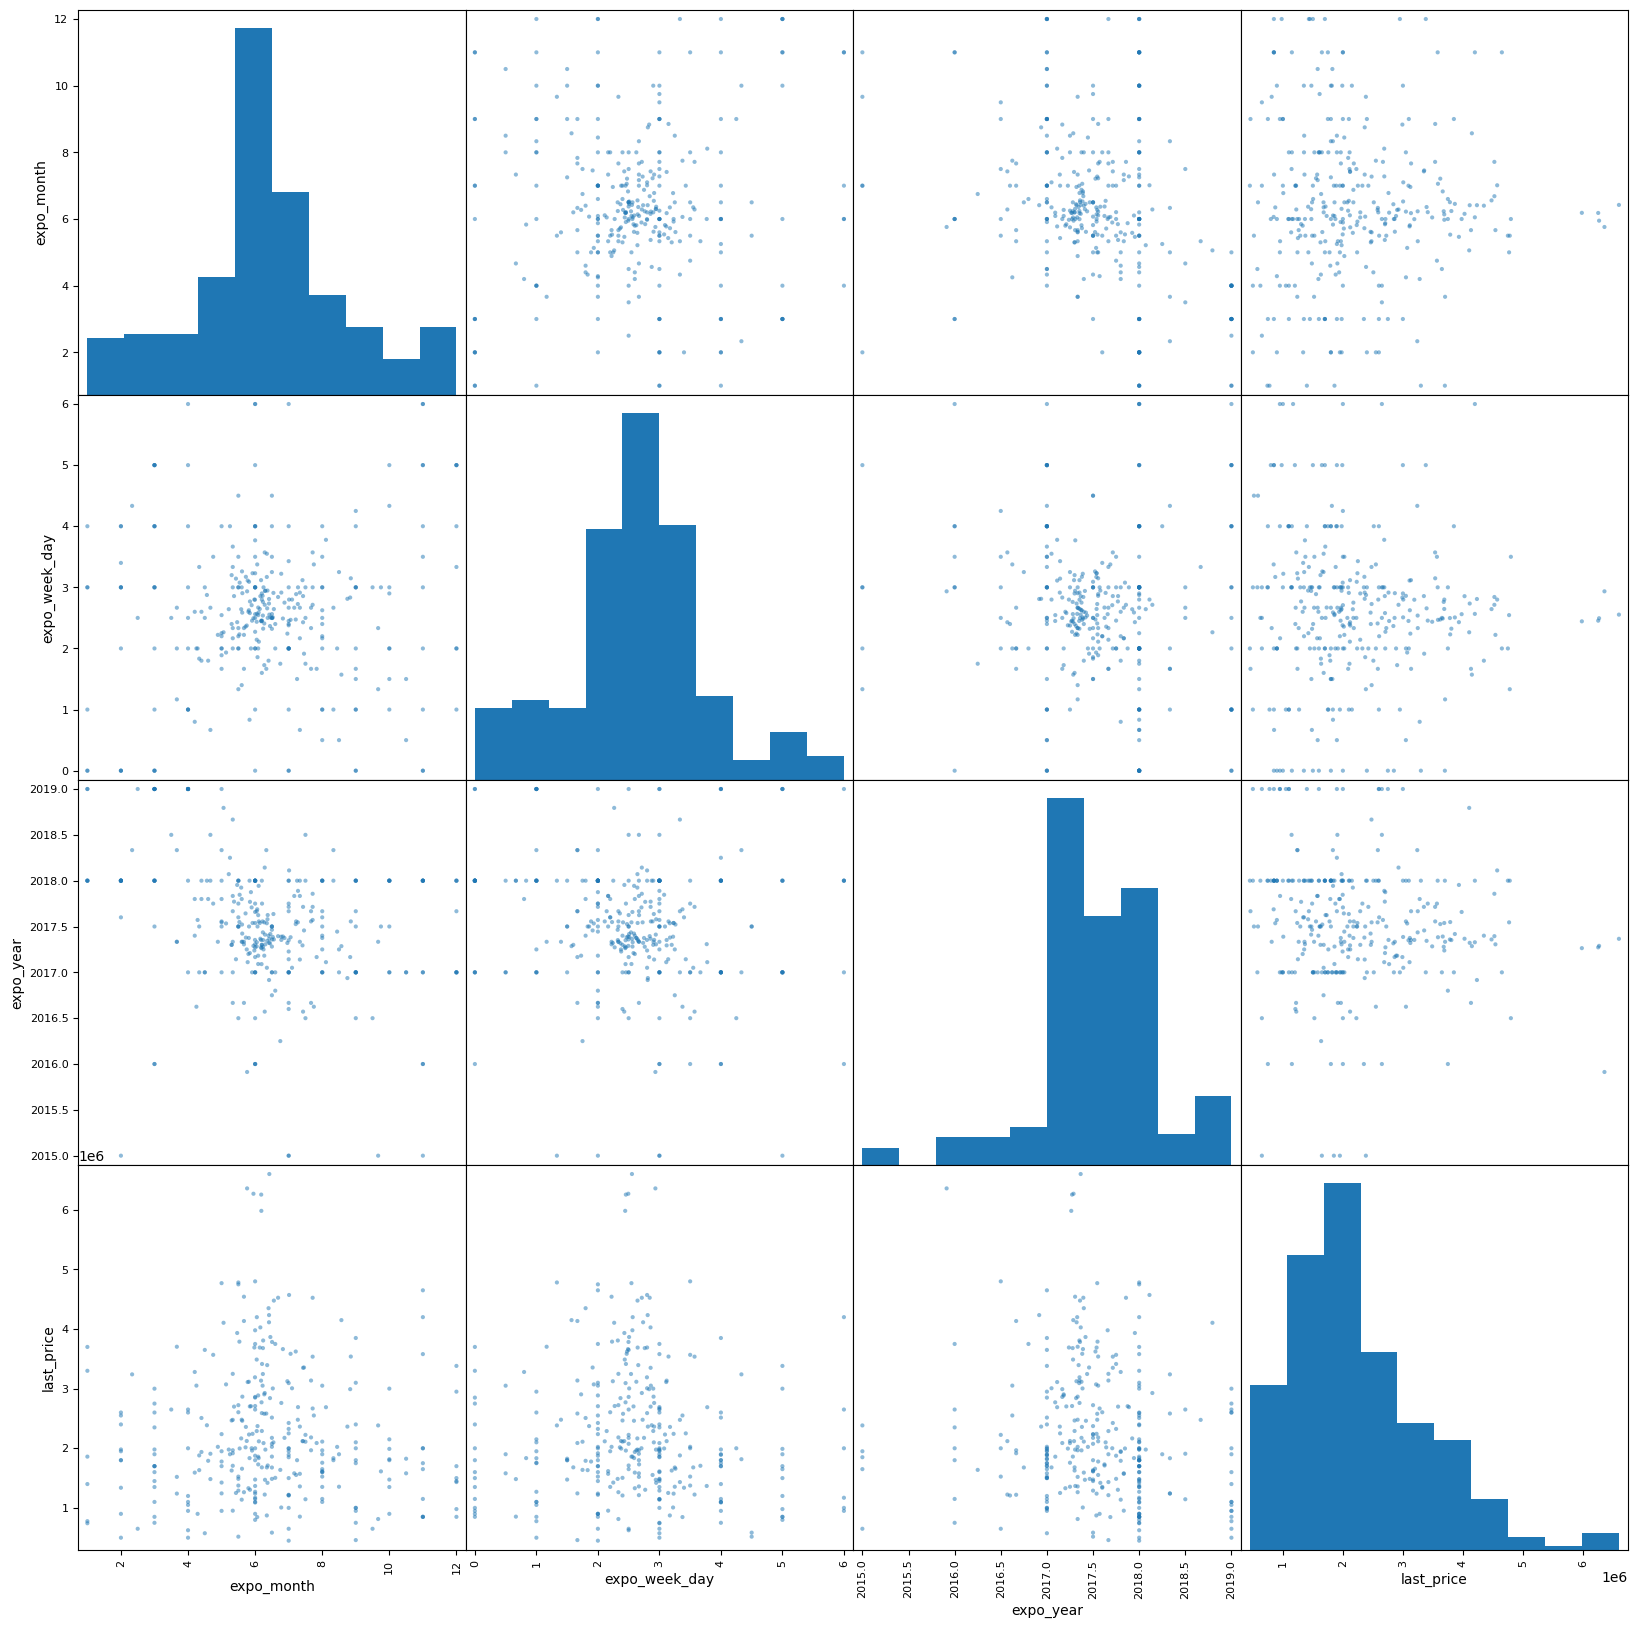

In [50]:
df.info()
pt_date_price = df.pivot_table(index='locality_name', 
                                 values=['expo_week_day', 'expo_month', 'expo_year', 'last_price'])

pd.plotting.scatter_matrix(pt_date_price, figsize=(20, 20));


Довольно странно, но, судя по всему, есть небольшая отрицательная зависимость между годом и ценой... Но все же влияние их друг на друга настолько незначительно, что рассматривать ее не стоит. Скорее всего основные факторы, влияющие на стоимость квартиры - это все же площадь и тип этажа.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

,lp_in_le6,sq_meter_price
locality_name,,
Всеволожск,3.783457,68768.252761
Выборг,3.190487,58220.290397
Гатчина,3.488301,68911.439770
Колпино,3.866289,75333.295801
Пушкин,5.982851,102928.479157
Санкт-Петербург,6.600823,110523.279916
деревня Кудрово,4.234158,92473.547576
посёлок Мурино,3.663932,85468.206005
посёлок Парголово,4.477609,90332.263023


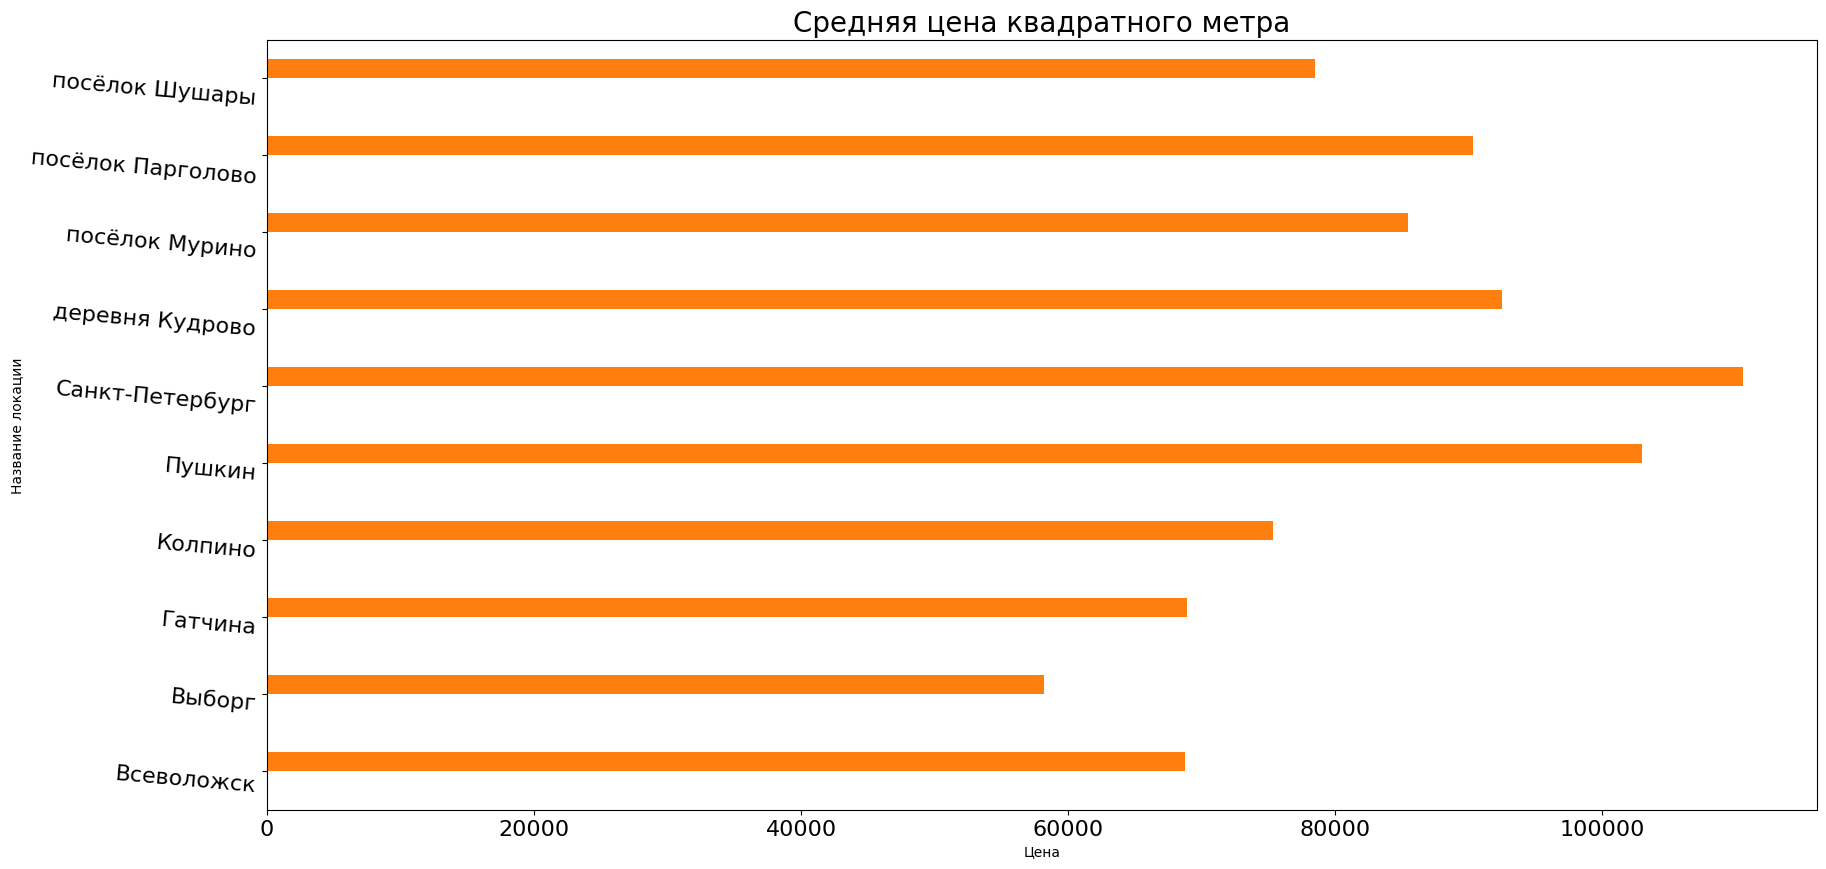

In [51]:
main_local = df['locality_name'].value_counts().head(10)
main_local = main_local.index.tolist()
isin = df[df['locality_name'].isin(main_local)]
isin_pt = isin.pivot_table(index='locality_name', values = ['sq_meter_price','lp_in_le6'], aggfunc = 'mean')
isin_pt.reindex(isin_pt.sort_values(by='sq_meter_price', ascending=False).index)#df=
meanpr = isin_pt.plot(kind = 'barh', figsize=(20, 10), rot = -5, legend = False, fontsize = 16);
meanpr.set_title('Средняя цена квадратного метра', fontsize = 20);
meanpr.set_xlabel('Цена');
meanpr.set_ylabel('Название локации');
display(isin_pt)

#print(df)

#### Зависимость стоимости объкта от расположения

Посмотрим, как влияет расположение недвижимости от центра города в СПБ на цену.

In [55]:
spb = df[df['locality_name'] == 'Санкт-Петербург']
spb['last_price_le6'] = spb['last_price']/1000000
spb_pt = spb.pivot_table(index='city_centre_km', values = ['last_price_le6'], aggfunc = 'mean').reset_index()
spb_pt.reindex(spb_pt.sort_values(by='last_price_le6', ascending=False).index)#df_spb_km=
display(spb_pt)

C:\Users\Leron\AppData\Local\Temp\ipykernel_5348\1125843562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['last_price_le6'] = spb['last_price']/1000000


,city_centre_km,last_price_le6
0,0.0,9.248333
1,1.0,11.393043
2,2.0,10.364457
3,3.0,9.118279
4,4.0,9.702193
5,5.0,10.077519
6,6.0,9.158807
7,7.0,8.972625
8,8.0,8.218198
9,9.0,6.663439


Так же посмотрим на самое дорогое и самое дешевое жилье в Санкт-Петербурге.

In [53]:
too_exp = spb.loc[(spb['city_centre_km'] == 27)&(spb['last_price_le6'] >= 10)]
its_ok = spb.loc[(spb['city_centre_km'] == 27)&(spb['last_price_le6'] <= 10)]
too_exp.shape
display(too_exp)
display(its_ok)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_meter_price,expo_week_day,expo_month,expo_year,floor_type,city_centre_km,lp_in_le6,last_price_le6
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128.0,193918.918919,1,11,2017,другое,27.0,14.35,14.35


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_meter_price,expo_week_day,expo_month,expo_year,floor_type,city_centre_km,lp_in_le6,last_price_le6
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,178.0,70312.5,1,2,2018,последний,27.0,2.25,2.25


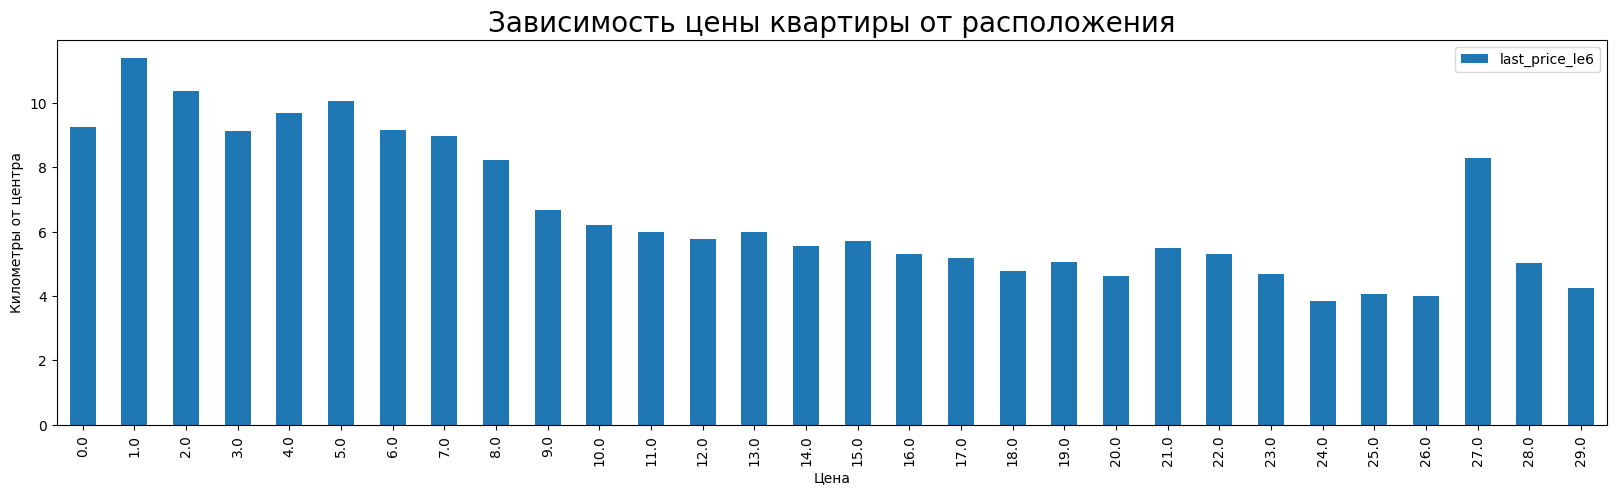

In [59]:
hist_spb = spb_pt.plot(x='city_centre_km', y='last_price_le6', kind='bar', figsize=(20, 5));
hist_spb.set_title('Зависимость цены квартиры от расположения', fontsize = 20);
hist_spb.set_xlabel('Цена');
hist_spb.set_ylabel('Километры от центра');

Мы видим тенденцию понижения цены в зависимости от удаленности от центра города. Что не удивительно, недвижимость в центре всегда дороже, чем на окраине города. Есть интересные выбросы на 27 км от центра Питербурга. 
Судя по всему на 27мом км за три года было только два объявления, которые очень сильно отличаются по стоимости. У них отличается год публикации. Кому-то удалось продать недвижимость за 14 млн, а кто-то продает на последнем этаже недвижимость за 2 млн. Такой выброс немного портит статистику, но не значительно. Скорее всего, стоимость недвижимости на этом километре будет примерно равен 4,5 млн - (медиана 26 и 28 км).



### Общий вывод

Основная задача проекта была не доказательство или опровержение какой-либо гипотезы, а изучение и предобработка предоставленных данных.

Исходя из исследования, мы можем прийти к обобщенным выводам о том, что стоимость недвижимости зависит от своего расположения относительно Санкт-Петербурга, а стоимость недвижимости в Санкт-Петербурге зависит от ее расположения относительно центра. Так же на стоимость влияет размер кухни, размер самой недвижимости и тип этажа квартиры ('первый', 'последний', 'другое').

Так же мы можем наблюдать, что количество объявлений в 2017-2019 годах сильно увеличилось и то, что зимой объявления размещают чаще, чем в другие сезоны. Еще есть информация касательно дней размещения объявления. Вторник и четверг наиболее частые дни размещений.

Эти данные может использовать как пользователь Яндекс.Недвижимости, который ищет недвижимость к покупке, так и продавец для того, чтобы сориентировать по стоимости и времени публикаций.